In [152]:
# Initialize Otter
import otter
grader = otter.Notebook("lab4.ipynb")

In [153]:
import sys
from hashlib import sha1

import matplotlib.pyplot as plt
import altair as alt
import altair_ally as aly
import numpy as np
import pandas as pd
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_validate,
    train_test_split,
)
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.preprocessing import (
    MinMaxScaler,
    OneHotEncoder,
    OrdinalEncoder,
    StandardScaler,
)

from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegressionCV
import altair as alt
alt.data_transformers.enable('data_server')
aly.alt.data_transformers.enable('data_server')
alt.renderers.enable('mimetype')


from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.datasets import fetch_california_housing
from scipy.stats import loguniform, randint, uniform

from sklearn.metrics import f1_score, mean_squared_error, mean_absolute_percentage_error
from sklearn.compose import TransformedTargetRegressor
from numpy import array
from numpy.linalg import norm


# Lab 4: Putting it all together in a mini project

**This lab is an optional group lab.** You can choose to work alone of in a group of up to four students. You are in charge of how you want to work and who you want to work with. Maybe you really want to go through all the steps of the ML process yourself or maybe you want to practice your collaboration skills, it is up to you! Just remember to indicate who your group members are (if any) when you submit on Gradescope. If you choose to work in a group, you only need to use one of your GitHub repos.

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## Submission instructions
rubric={mechanics}

<p>You receive marks for submitting your lab correctly, please follow these instructions:</p>

<ul>
  <li><a href="https://ubc-mds.github.io/resources_pages/general_lab_instructions/">
      Follow the general lab instructions.</a></li>
  <li><a href="https://github.com/UBC-MDS/public/tree/master/rubric">
      Click here to view a description of the rubrics used to grade the questions</a></li>
  <li>Make at least three commits.</li>
  <li>Push your <code>.ipynb</code> file to your GitHub repository for this lab and upload it to Gradescope.</li>
    <ul>
      <li>Before submitting, make sure you restart the kernel and rerun all cells.</li>
    </ul>
  <li>Also upload a <code>.pdf</code> export of the notebook to facilitate grading of manual questions (preferably WebPDF, you can select two files when uploading to gradescope)</li>
  <li>Don't change any variable names that are given to you, don't move cells around, and don't include any code to install packages in the notebook.</li>
  <li>The data you download for this lab <b>SHOULD NOT BE PUSHED TO YOUR REPOSITORY</b> (there is also a <code>.gitignore</code> in the repo to prevent this).</li>
  <li>Include a clickable link to your GitHub repo for the lab just below this cell
    <ul>
      <li>It should look something like this https://github.ubc.ca/MDS-2020-21/DSCI_531_labX_yourcwl.</li>
    </ul>
  </li>
</ul>
</div>

_Points:_ 2

https://github.com/UBC-MDS/dsci573_lab4_credit-card-class

<!-- END QUESTION -->

## Introduction <a name="in"></a>

In this lab you will be working on an open-ended mini-project, where you will put all the different things you have learned so far in 571 and 573 together to solve an interesting problem.

A few notes and tips when you work on this mini-project: 

#### Tips
1. Since this mini-project is open-ended there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure you explain your decisions whenever necessary. 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 

#### Assessment
We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you instead do a bunch of sane things and you have clearly motivated your choices, but still get lower model performance than your friend, don't sweat it.


#### A final note
Finally, the style of this "project" question is different from other assignments. It'll be up to you to decide when you're "done" -- in fact, this is one of the hardest parts of real projects. But please don't spend WAY too much time on this... perhaps "several hours" but not "many hours" is a good guideline for a high quality submission. Of course if you're having fun you're welcome to spend as much time as you want! But, if so, try not to do it out of perfectionism or getting the best possible grade. Do it because you're learning and enjoying it. Students from the past cohorts have found such kind of labs useful and fun and we hope you enjoy it as well. 

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 1. Pick your problem and explain the prediction problem <a name="1"></a>
rubric={reasoning}

In this mini project, you will pick one of the following problems: 

1. A classification problem of predicting whether a credit card client will default or not. For this problem, you will use [Default of Credit Card Clients Dataset](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). In this data set, there are 30,000 examples and 24 features, and the goal is to estimate whether a person will default (fail to pay) their credit card bills; this column is labeled "default.payment.next.month" in the data. The rest of the columns can be used as features. You may take some ideas and compare your results with [the associated research paper](https://www.sciencedirect.com/science/article/pii/S0957417407006719), which is available through [the UBC library](https://www.library.ubc.ca/). 

OR 

2. A regression problem of predicting `reviews_per_month`, as a proxy for the popularity of the listing with [New York City Airbnb listings from 2019 dataset](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data). Airbnb could use this sort of model to predict how popular future listings might be before they are posted, perhaps to help guide hosts create more appealing listings. In reality they might instead use something like vacancy rate or average rating as their target, but we do not have that available here.

**Your tasks:**

1. Spend some time understanding the problem and what each feature means. Write a few sentences on your initial thoughts on the problem and the dataset. 
2. Download the dataset and read it as a pandas dataframe. 
3. Carry out any preliminary preprocessing, if needed (e.g., changing feature names, handling of NaN values etc.)
    
</div>

_Points:_ 3

#### 1.1 Problem definition

*Overview*

"Default of Credit Card Clients Dataset" contains data on demographics (i.e age, marriage status), previous repayment statuses, previous bill statements, and previous payment amounts for many clients. It also contains a column (`default.payment.next.month`) specifying whether the client will pay their credit card on time next month or not. 

*Problem*

The problem we are trying to solve is predicting the target `default.payment.next.month` column (whether a client will pay on time or not) based on the rest of the data for a particular client. A value of '1' indicates that the user defaulted their payment (i.e did not pay on time). 

*Columns*

1. Our initial thoughts are that the columns `PAY_0`, `PAY_2`, `PAY_3`, etc. will be very important in predicting our target. This is because this data shows the user's previous payment behavior, and it is likely that a client would show similar behaviour in the future. 
2. The column `EDUCATION` could also be important. This is because a higher education status (e.g. university, graduate school) could indicate that a client could be more capable of being able to make their payment (i.e higher paying job with more stable monthly/yearly income). 
3. `SEX` should potentially not be an important feature. We should be sensitive to this feature, and may potentially need to remove it to avoid introducing any bias or unfairness in our prediction. 
4. The `BILL_AMT*` and `PAY_AMT*` columns could potentially have some interaction effects and reveal trends leading up to the 'next month' we are interested in. For example, if there is an increase across the `BILL_AMT*` columns (a client needs to pay more each month) but a decrease across the `PAY_AMT*` columns, it could be a hint that it would be difficult for the client to make next month's payment. 

#### 1.2 Download dataset and read it as a pandas dataframe

In [154]:
df = pd.read_csv('data/UCI_Credit_Card.csv')

#### 1.3 Preliminary preprocessing

We did not remove any NaN values at this stage (?why?), but we renamed two columns: 
1. `PAY_0` was renamed to `PAY_1` to be more consistent with the rest of the `PAY_*` columns. 
2. `default.payment.next.month` was renamed to `target` to be easier to refer to, and so that we are clear which column we are predicting. 

In [155]:
df = df.rename(columns={'default.payment.next.month': 'target', 'PAY_0':'PAY_1'})

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 2. Data splitting <a name="2"></a>
rubric={reasoning}

**Your tasks:**

1. Split the data into train and test portions.

> Make the decision on the `test_size` based on the capacity of your laptop. 
    
</div>

_Points:_ 1

In [156]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=123)

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 3. EDA <a name="3"></a>
rubric={viz,reasoning}
    
Perform exploratory data analysis on the train set.

**Your tasks:**

1. Include at least two summary statistics and two visualizations that you find useful, and accompany each one with a sentence explaining it.
2. Summarize your initial observations about the data. 
3. Pick appropriate metric/metrics for assessment. 
    
</div>

_Points:_ 6

#### 3.1 Explanation for each analysis
Please refer to the description above each EDA analysis. 

#### 3.2 Summary of EDA. 
1. From the output of `train_df.info()`, it can be seen that most of the columns are numeric with datatypes being either int64 or float64, and that there are no null values in the dataframe. 
2. From `value_counts` on the `target` column, it can be seen that there is a quite severe class imbalance, where about 78% of the target values are 0 while only 22% are 1. This indicates that there are a lot more negative cases than positive cases and we will need to address the class imbalance issue when training our models. 
3. The histogram indicates that the distribution for target = 1 is centred at around mid-20s, while that of target = 0 is centred at around late-20s, indicating that age might have an association with the default payment. In addition, it can be seen that `BILL_AMT` is also associated with the target. 
4. The correlation heat map suggests that there is a relatively strong correlation between `PAY_AMT` and `BILL_AMT`, and this is expected since that the payment amount of a credit card is related to the bill amount in reality. This suggests that there might potentially be multicollinearity in the dataset, and we might need to do some feature engineering and feature selection to address this problem. 


#### 3.3 Metric selection
1. In this case study, we will classify the clients who have a default payment as "positive" (i.e., when `target` = 1), and those who do not have a default payment as "negative" (i.e., when `target` = 0).
2. Since there is class imbalance in the dataset, accuracy is not a good metric because the class imbalance will introduce bias in the accuracy, and consequently make accuracy not representative of model performance. 
3. In the case of predicting if a client will have a default payment or not, we should not look only at recall or precision. We normally use recall when we care more about false negative cases, and precision when we care more about false positive cases. However, in this case, we need to care about both recall and precision. We do not want recall to be too low since we do not want a client that will have default payment to be classified as negative, because this will result in a consequence that credit cards will be issued to those who are not able to make payment in time, causing a high deficit in credit card issuing companies/banks. On the contrary, if the precision is too low, those clients who have good credit history and are indeed eligible to get approval for credit cards will get rejected. 
4. From the aforementioned discussion it can be seen that the best metric here to use will be f1, since f1 is the harmonic mean of both recall and precision, which is suitable for our case where we seek to find a balance between recall and precision. 


---

#### EDA

##### The `train_df.head()` function outputs the first few rows of the data, and gives us a high level glance at how the data looks like.

In [157]:
train_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,target
19682,19683,200000.0,2,2,1,46,0,0,0,0,...,103422.0,95206.0,65108.0,3692.0,5000.0,3300.0,2500.0,2930.0,1500.0,0
11062,11063,120000.0,2,1,1,32,-1,-1,-1,-1,...,476.0,802.0,326.0,652.0,326.0,476.0,802.0,0.0,326.0,1
197,198,20000.0,2,1,2,22,0,0,0,0,...,8332.0,18868.0,19247.0,1500.0,1032.0,541.0,20000.0,693.0,1000.0,0
23620,23621,100000.0,2,5,2,34,0,0,0,0,...,23181.0,7721.0,3219.0,5004.0,3811.0,3002.0,4000.0,3219.0,1864.0,0
26031,26032,290000.0,2,2,2,29,0,0,0,0,...,8770.0,9145.0,10016.0,1130.0,1502.0,1300.0,500.0,1000.0,1001.0,0


##### `train_df.info()` looks at how many null values there are in each column, and also examines the types of data contained in each column. 

In [158]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24000 entries, 19682 to 19966
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         24000 non-null  int64  
 1   LIMIT_BAL  24000 non-null  float64
 2   SEX        24000 non-null  int64  
 3   EDUCATION  24000 non-null  int64  
 4   MARRIAGE   24000 non-null  int64  
 5   AGE        24000 non-null  int64  
 6   PAY_1      24000 non-null  int64  
 7   PAY_2      24000 non-null  int64  
 8   PAY_3      24000 non-null  int64  
 9   PAY_4      24000 non-null  int64  
 10  PAY_5      24000 non-null  int64  
 11  PAY_6      24000 non-null  int64  
 12  BILL_AMT1  24000 non-null  float64
 13  BILL_AMT2  24000 non-null  float64
 14  BILL_AMT3  24000 non-null  float64
 15  BILL_AMT4  24000 non-null  float64
 16  BILL_AMT5  24000 non-null  float64
 17  BILL_AMT6  24000 non-null  float64
 18  PAY_AMT1   24000 non-null  float64
 19  PAY_AMT2   24000 non-null  float64
 20  PA

##### `train_df.describe()` shows the the statistical details including mean, minimum, maximum, different percentiles, etc. 

In [159]:
train_df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,target
count,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,...,24000.000000,24000.000000,24000.000000,24000.000000,2.400000e+04,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000
mean,14964.174292,167893.486667,1.603125,1.851958,1.553375,35.488458,-0.017542,-0.135292,-0.170042,-0.224292,...,43389.105625,40297.970375,38708.777542,5656.319917,5.910454e+03,5280.658708,4763.854250,4805.837667,5277.577958,0.222167
std,8660.479272,130109.666875,0.489260,0.790560,0.521452,9.217424,1.125331,1.199812,1.201709,1.170630,...,64572.844994,60878.153831,59355.284889,16757.718059,2.134743e+04,17973.951980,15162.056345,15251.828322,18222.046645,0.415711
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-65167.000000,-61372.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7467.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2310.000000,1744.250000,1200.000000,990.000000,8.150000e+02,390.000000,281.750000,234.000000,110.750000,0.000000
50%,14975.000000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19032.000000,18019.000000,16812.500000,2100.000000,2.010000e+03,1801.500000,1500.000000,1500.000000,1500.000000,0.000000
75%,22460.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54591.500000,50237.250000,49132.750000,5009.000000,5.000000e+03,4600.000000,4026.000000,4009.250000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.227082e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


##### `train_df['target'].value_counts(normalize=True)` shows the normalized value counts for each category in the `target`. We use this function to see if there is any class imbalance in the data.

In [160]:
train_df['target'].value_counts(normalize=True)

0    0.777833
1    0.222167
Name: target, dtype: float64

##### `train_df['EDUCATION'].value_counts()` looks at the counts of values of each category in the `EDUCATION` column.

In [161]:
train_df['EDUCATION'].value_counts()

2    11198
1     8494
3     3938
5      229
4       91
6       39
0       11
Name: EDUCATION, dtype: int64

##### By looking at `train_df['EDUCATION'].value_counts()` as well as the description about each feature if this dataset on Kaggle, we made the following changes to the data: The levels 0, 5 and 6 in EDUCATION were changed to 4, since 4 refers to "others", and 0, 5 and 6 refer to "unknown".

In [162]:
train_df['EDUCATION'].replace({0: 4, 5: 4, 6: 4}, inplace=True)
test_df['EDUCATION'].replace({0: 4, 5: 4, 6: 4}, inplace=True)

##### `aly.dist(train_df)` gives us a general idea of how the data in each column is distributed.

In [163]:
aly.dist(train_df)

<VegaLite 4 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


##### The complied histogram plot shows the shape of distribution of each column, and the histograms are grouped by colours with light blue indicating target = 0 and dark blue indicating target = 1.

In [164]:
alt.Chart(train_df, width=200, height=100).mark_bar().encode(
    x=alt.X(alt.repeat(), bin=alt.Bin(maxbins=70)),
    y='count()',
    color='target'
).repeat(
    train_df.select_dtypes('number').nunique().to_frame('count').index.tolist(),
    columns=3
)

<VegaLite 4 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


##### The correlation heatmap shows the correlation coefficients between each pair of variables, and the colour is in accordance with the intensity. 

In [165]:
train_df.corr('spearman').style.background_gradient()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,target
ID,1.000000,0.028469,0.021694,0.039952,-0.027409,0.026562,-0.020636,-0.001546,-0.006584,-0.000507,-0.014848,-0.005927,0.012719,0.012799,0.019714,0.035414,0.017515,0.021229,0.014044,0.054245,0.092890,0.019025,0.011364,0.037639,-0.013663
LIMIT_BAL,0.028469,1.000000,0.060169,-0.268531,-0.115429,0.185045,-0.297013,-0.343210,-0.332020,-0.308016,-0.281681,-0.261785,0.052238,0.044509,0.061552,0.075757,0.081559,0.090824,0.270676,0.280822,0.286323,0.283519,0.294502,0.316610,-0.164635
SEX,0.021694,0.060169,1.000000,0.015623,-0.034660,-0.091806,-0.053721,-0.072805,-0.066877,-0.059852,-0.050116,-0.038584,-0.043248,-0.040394,-0.027774,-0.021388,-0.012566,-0.008118,-0.003166,0.008268,0.022290,0.013667,0.013616,0.036850,-0.043814
EDUCATION,0.039952,-0.268531,0.015623,1.000000,-0.162214,0.158924,0.138693,0.171794,0.165045,0.155109,0.139510,0.126788,0.099178,0.096126,0.082629,0.071644,0.062884,0.058425,-0.040144,-0.050602,-0.041214,-0.041627,-0.049218,-0.053625,0.046648
MARRIAGE,-0.027409,-0.115429,-0.034660,-0.162214,1.000000,-0.462261,0.019997,0.033960,0.040346,0.039739,0.044412,0.038160,-0.001109,0.001563,-0.003423,0.000362,-0.003043,-0.001289,-0.008185,-0.018980,-0.014063,-0.021571,-0.017768,-0.021047,-0.025359
AGE,0.026562,0.185045,-0.091806,0.158924,-0.462261,1.000000,-0.056751,-0.078259,-0.079111,-0.075554,-0.078913,-0.069302,0.007471,0.007098,0.006361,0.001605,0.005877,0.005530,0.035641,0.043351,0.033097,0.043230,0.039578,0.040332,0.006196
PAY_1,-0.020636,-0.297013,-0.053721,0.138693,0.019997,-0.056751,1.000000,0.626059,0.548310,0.516108,0.484550,0.461945,0.315844,0.332046,0.314524,0.304603,0.299338,0.287858,-0.096829,-0.064678,-0.057278,-0.031067,-0.028266,-0.046358,0.288651
PAY_2,-0.001546,-0.343210,-0.072805,0.171794,0.033960,-0.078259,0.626059,1.000000,0.802436,0.715323,0.674924,0.632789,0.572869,0.554516,0.520239,0.496316,0.476632,0.457259,0.022447,0.084354,0.085765,0.095336,0.099057,0.080687,0.215009
PAY_3,-0.006584,-0.332020,-0.066877,0.165045,0.040346,-0.079111,0.548310,0.802436,1.000000,0.803100,0.718232,0.670359,0.526818,0.593251,0.560372,0.531695,0.507870,0.484343,0.218532,0.040167,0.103918,0.120145,0.127454,0.094928,0.195484
PAY_4,-0.000507,-0.308016,-0.059852,0.155109,0.039739,-0.075554,0.516108,0.715323,0.803100,1.000000,0.821506,0.729281,0.513242,0.561968,0.620096,0.591472,0.559134,0.529446,0.188553,0.247401,0.070495,0.144809,0.160479,0.140376,0.173174


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-warning">

## 4. Feature engineering (Challenging)
rubric={reasoning}

**Your tasks:**

1. Carry out feature engineering. In other words, extract new features relevant for the problem and work with your new feature set in the following exercises. You may have to go back and forth between feature engineering and preprocessing.
    
</div>

_Points:_ 0.5

Feature engineering is carried out with the aim to add new features that might be useful for the prediction. We add several features based on the original features:

1. Ratio of amount paid of the month to billed amount of the month (BP_R1 to BP_R6 for the six months of data respectively). This feature could potentially be useful because being able to pay a larger proportion of the billed amount is often associated with better financial status.

- Note that when there is zero division, the value of the ratio is infinity due to the zero denominator, or missing value when it is 0 divided by 0. We decide to code both of these cases to 1 for the reason that zero billed amount (not spending any money with the credit card) could be an indication that the person has enough money else where and has the ability to pay the full bill. 

2. Ratio of billed amount of the month to the amount of given credit (CB_1 to CB_6). This feature could possibly help us understand the user's spending habits and whether the person is close to the limit of their credit limit.

Since these features are numeric variables, we will apply standard scaler to the variables in the preprocessing pipeline.

Note: We also tried out a model with two other features, with the aim to reduce redundancy in the features that are highly correlated with each other. Although tree-based models can handle correlated features pretty well, we want to explore if the model performs better when there are less potentially redundant features. The two features are:
- average of all six month's ratios of billed amount of the month to the amount of given credit(CB_1 to CB_6)
- average of all six months' billed amount (BILL_AMT1to BILL_AMT6)
We tested out the model with CB_1 to CB_6 and BILL_AMT1to BILL_AMT6 removed when including these two added features.
However, the model did not perfomed better (in fact, with slight decrease in performance, thus we did not continue using the aggregated features.) (This exploration is done in Q11)

We continue analysis with keeping CB_1 to CB_6 and BILL_AMT1to BILL_AMT6 separated.

In [166]:
train_df['BP_R1'] = train_df['PAY_AMT1']/train_df['BILL_AMT1']
train_df['BP_R2'] = train_df['PAY_AMT2']/train_df['BILL_AMT2']
train_df['BP_R3'] = train_df['PAY_AMT3']/train_df['BILL_AMT3']
train_df['BP_R4'] = train_df['PAY_AMT4']/train_df['BILL_AMT4']
train_df['BP_R5'] = train_df['PAY_AMT5']/train_df['BILL_AMT5']
train_df['BP_R6'] = train_df['PAY_AMT6']/train_df['BILL_AMT6']

test_df['BP_R1'] = test_df['PAY_AMT1']/test_df['BILL_AMT1']
test_df['BP_R2'] = test_df['PAY_AMT2']/test_df['BILL_AMT2']
test_df['BP_R3'] = test_df['PAY_AMT3']/test_df['BILL_AMT3']
test_df['BP_R4'] = test_df['PAY_AMT4']/test_df['BILL_AMT4']
test_df['BP_R5'] = test_df['PAY_AMT5']/test_df['BILL_AMT5']
test_df['BP_R6'] = test_df['PAY_AMT6']/test_df['BILL_AMT6']


In [167]:
train_df['CB_1'] = train_df['BILL_AMT1']/train_df['LIMIT_BAL']
train_df['CB_2'] = train_df['BILL_AMT2']/train_df['LIMIT_BAL']
train_df['CB_3'] = train_df['BILL_AMT3']/train_df['LIMIT_BAL']
train_df['CB_4'] = train_df['BILL_AMT4']/train_df['LIMIT_BAL']
train_df['CB_5'] = train_df['BILL_AMT5']/train_df['LIMIT_BAL']
train_df['CB_6'] = train_df['BILL_AMT6']/train_df['LIMIT_BAL']

test_df['CB_1'] = test_df['BILL_AMT1']/test_df['LIMIT_BAL']
test_df['CB_2'] = test_df['BILL_AMT2']/test_df['LIMIT_BAL']
test_df['CB_3'] = test_df['BILL_AMT3']/test_df['LIMIT_BAL']
test_df['CB_4'] = test_df['BILL_AMT4']/test_df['LIMIT_BAL']
test_df['CB_5'] = test_df['BILL_AMT5']/test_df['LIMIT_BAL']
test_df['CB_6'] = test_df['BILL_AMT6']/test_df['LIMIT_BAL']

In [168]:
train_df.replace([np.inf, -np.inf, np.nan], 1, inplace=True)
test_df.replace([np.inf, -np.inf, np.nan], 1, inplace=True)

train_df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BP_R3,BP_R4,BP_R5,BP_R6,CB_1,CB_2,CB_3,CB_4,CB_5,CB_6
count,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,...,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000
mean,14964.174292,167893.486667,1.603125,1.841000,1.553375,35.488458,-0.017542,-0.135292,-0.170042,-0.224292,...,-7.429095,-1.047460,-0.477318,-0.664125,0.423040,0.409965,0.391287,0.359030,0.332115,0.316376
std,8660.479272,130109.666875,0.489260,0.744586,0.521452,9.217424,1.125331,1.199812,1.201709,1.170630,...,672.633914,150.600387,52.977849,88.392504,0.412328,0.405488,0.398033,0.369213,0.350813,0.344571
min,1.000000,10000.000000,1.000000,1.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-82150.000000,-17266.666667,-4077.250000,-11349.571429,-0.230900,-0.964657,-0.925082,-1.374500,-0.876743,-1.509530
25%,7467.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,0.031560,0.030455,0.035090,0.035060,0.021957,0.017724,0.015954,0.014121,0.010833,0.007639
50%,14975.000000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,0.055267,0.048416,0.053952,0.058248,0.312815,0.291856,0.269043,0.240000,0.209632,0.179915
75%,22460.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,0.613799,0.612331,0.853453,1.000000,0.829152,0.804140,0.752965,0.667755,0.600648,0.579607
max,30000.000000,1000000.000000,2.000000,4.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,6333.333333,8891.357143,1738.424242,2643.330000,6.455300,6.380500,10.688575,5.146850,4.935500,3.885550


In [169]:
train_df.corr('spearman').style.background_gradient()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,target,BP_R1,BP_R2,BP_R3,BP_R4,BP_R5,BP_R6,CB_1,CB_2,CB_3,CB_4,CB_5,CB_6
ID,1.000000,0.028469,0.021694,0.039952,-0.027409,0.026562,-0.020636,-0.001546,-0.006584,-0.000507,-0.014848,-0.005927,0.012719,0.012799,0.019714,0.035414,0.017515,0.021229,0.014044,0.054245,0.092890,0.019025,0.011364,0.037639,-0.013663,-0.008219,0.029790,0.076862,-0.028111,-0.018979,0.010034,0.000709,0.002124,0.013974,0.031712,0.005787,0.010689
LIMIT_BAL,0.028469,1.000000,0.060169,-0.268531,-0.115429,0.185045,-0.297013,-0.343210,-0.332020,-0.308016,-0.281681,-0.261785,0.052238,0.044509,0.061552,0.075757,0.081559,0.090824,0.270676,0.280822,0.286323,0.283519,0.294502,0.316610,-0.164635,0.117758,0.133150,0.149876,0.155960,0.148227,0.154370,-0.410179,-0.409644,-0.394171,-0.383270,-0.360711,-0.320880
SEX,0.021694,0.060169,1.000000,0.015623,-0.034660,-0.091806,-0.053721,-0.072805,-0.066877,-0.059852,-0.050116,-0.038584,-0.043248,-0.040394,-0.027774,-0.021388,-0.012566,-0.008118,-0.003166,0.008268,0.022290,0.013667,0.013616,0.036850,-0.043814,0.031160,0.046799,0.055256,0.033628,0.020956,0.040790,-0.080434,-0.076982,-0.064586,-0.058852,-0.047691,-0.036772
EDUCATION,0.039952,-0.268531,0.015623,1.000000,-0.162214,0.158924,0.138693,0.171794,0.165045,0.155109,0.139510,0.126788,0.099178,0.096126,0.082629,0.071644,0.062884,0.058425,-0.040144,-0.050602,-0.041214,-0.041627,-0.049218,-0.053625,0.046648,-0.103520,-0.110664,-0.088193,-0.093195,-0.088726,-0.085599,0.212252,0.205954,0.193096,0.182106,0.164679,0.151747
MARRIAGE,-0.027409,-0.115429,-0.034660,-0.162214,1.000000,-0.462261,0.019997,0.033960,0.040346,0.039739,0.044412,0.038160,-0.001109,0.001563,-0.003423,0.000362,-0.003043,-0.001289,-0.008185,-0.018980,-0.014063,-0.021571,-0.017768,-0.021047,-0.025359,-0.008176,-0.023944,-0.018959,-0.030365,-0.015221,-0.026771,0.049075,0.048675,0.043631,0.048224,0.043599,0.041570
AGE,0.026562,0.185045,-0.091806,0.158924,-0.462261,1.000000,-0.056751,-0.078259,-0.079111,-0.075554,-0.078913,-0.069302,0.007471,0.007098,0.006361,0.001605,0.005877,0.005530,0.035641,0.043351,0.033097,0.043230,0.039578,0.040332,0.006196,0.011526,0.019019,0.016932,0.035941,0.025350,0.032347,-0.061544,-0.063487,-0.064616,-0.074041,-0.067185,-0.062852
PAY_1,-0.020636,-0.297013,-0.053721,0.138693,0.019997,-0.056751,1.000000,0.626059,0.548310,0.516108,0.484550,0.461945,0.315844,0.332046,0.314524,0.304603,0.299338,0.287858,-0.096829,-0.064678,-0.057278,-0.031067,-0.028266,-0.046358,0.288651,-0.341986,-0.331470,-0.299097,-0.262861,-0.272616,-0.279888,0.403740,0.419934,0.409693,0.405685,0.399491,0.384160
PAY_2,-0.001546,-0.343210,-0.072805,0.171794,0.033960,-0.078259,0.626059,1.000000,0.802436,0.715323,0.674924,0.632789,0.572869,0.554516,0.520239,0.496316,0.476632,0.457259,0.022447,0.084354,0.085765,0.095336,0.099057,0.080687,0.215009,-0.521494,-0.427147,-0.380119,-0.350992,-0.352656,-0.353806,0.655760,0.634627,0.608539,0.592597,0.571930,0.549088
PAY_3,-0.006584,-0.332020,-0.066877,0.165045,0.040346,-0.079111,0.548310,0.802436,1.000000,0.803100,0.718232,0.670359,0.526818,0.593251,0.560372,0.531695,0.507870,0.484343,0.218532,0.040167,0.103918,0.120145,0.127454,0.094928,0.195484,-0.296934,-0.549934,-0.414094,-0.370738,-0.367529,-0.378374,0.598993,0.667882,0.641846,0.622240,0.598837,0.572100
PAY_4,-0.000507,-0.308016,-0.059852,0.155109,0.039739,-0.075554,0.516108,0.715323,0.803100,1.000000,0.821506,0.729281,0.513242,0.561968,0.620096,0.591472,0.559134,0.529446,0.188553,0.247401,0.070495,0.144809,0.160479,0.140376,0.173174,-0.310910,-0.330385,-0.544405,-0.411590,-0.396805,-0.391659,0.572445,0.621270,0.690337,0.668920,0.640040,0.609959


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 5. Preprocessing and transformations <a name="5"></a>
rubric={accuracy,reasoning}

**Your tasks:**

1. Identify different feature types and the transformations you would apply on each feature type. 
2. Define a column transformer, if necessary. 
    
</div>

_Points:_ 4

#### 5.1 Identify feature types and transformations

Please see the table below for a description of which transformation will be applied on each feature.

| Feature | Transformation | Explanation
| --- | ----------- | ----- |
| ID | drop | A categoric feature with no missing values. I will drop this column because every ID is unique. |
| LIMIT_BAL | scaling | A numeric feature with no missing values. It represents the amount of given credit in NT dollars for an entry. It will be a good idea to apply scaling, as the range of values (10000 to 1000000). |
| SEX | one-hot encoding with "binary = True" | A binarial categoric feature with no missing values. It represents whether entry is male or female. We should apply binarial one-hot encoding. |
| EDUCATION | ordinal encoding  | An ordinal feature with no missing values. It represents the education level of an entry about 1=graduate school, 2=university, 3=high school, 4=others. We should apply ordinal encoding. |
| MARRIAGE | one-hot encoding | A categoric feature with no missing values. It represents the marriage status of an entry about 1=married, 2=single, 3=others. |
| AGE | scaling | A numeric feature with no missing values. It represents the age of an entry. It will be a good idea to apply scaling, as the range of values (21 to 79). |
| PAY_1 | ordinal encoding | An ordinal feature with no missing values. It represents the Repayment status of an entry in first period about -2=no credit to pay, -1=pay on time, 0=pay on time but not full amount, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months and above. We should apply ordinal encoding. |
| PAY_2 | ordinal encoding | An ordinal feature with no missing values. It represents the Repayment status of an entry in second period about -2=no credit to pay, -1=pay on time, 0=pay on time but not full amount, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months and above. We should apply ordinal encoding. |
| PAY_3 | ordinal encoding | An ordinal feature with no missing values. It represents the Repayment status of an entry in third period about -2=no credit to pay, -1=pay on time, 0=pay on time but not full amount, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months and above. We should apply ordinal encoding. |
| PAY_4 | ordinal encoding | An ordinal feature with no missing values. It represents the Repayment status of an entry in fourth period about -2=no credit to pay, -1=pay on time, 0=pay on time but not full amount, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months and above. We should apply ordinal encoding. |
| PAY_5 | ordinal encoding | An ordinal feature with no missing values. It represents the Repayment status of an entry in fifth period about -2=no credit to pay, -1=pay on time, 0=pay on time but not full amount, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months and above. We should apply ordinal encoding. |
| PAY_6 | ordinal encoding | An ordinal feature with no missing values. It represents the Repayment status of an entry in sixth period about -2=no credit to pay, -1=pay on time, 0=pay on time but not full amount, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months and above. We should apply ordinal encoding. |
| BILL_AMT1 | scaling | A numeric feature with no missing values. It represents the amount of bill statement in the first period of an entry. It will be a good idea to apply scaling, as the range of values (-15308 to 964511). |
| BILL_AMT2 | scaling | A numeric feature with no missing values. It represents the amount of bill statement in the second period of an entry. It will be a good idea to apply scaling, as the range of values (-67526 to 983931). |
| BILL_AMT3 | scaling | A numeric feature with no missing values. It represents the amount of bill statement in the third period of an entry. It will be a good idea to apply scaling, as the range of values (-157264 to 855086). |
| BILL_AMT4 | scaling | A numeric feature with no missing values. It represents the amount of bill statement in the fourth period of an entry. It will be a good idea to apply scaling, as the range of values (-65167 to 891586). |
| BILL_AMT5 | scaling | A numeric feature with no missing values. It represents the amount of bill statement in the fifth period of an entry. It will be a good idea to apply scaling, as the range of values (-61372 to 927171). |
| BILL_AMT6 | scaling | A numeric feature with no missing values. It represents the amount of bill statement in the fifth period of an entry. It will be a good idea to apply scaling, as the range of values (-339603 to 961664). |
| PAY_AMT1 | scaling | A numeric feature with no missing values. It represents the amount of previous payment in the first period of an entry. It will be a good idea to apply scaling, as the range of values (0 to 873552). |
| PAY_AMT2 | scaling | A numeric feature with no missing values. It represents the amount of previous payment in the second period of an entry. It will be a good idea to apply scaling, as the range of values (0 to 1227082). |
| PAY_AMT3 | scaling | A numeric feature with no missing values. It represents the amount of previous payment in the third period of an entry. It will be a good idea to apply scaling, as the range of values (0 to 896040). |
| PAY_AMT4 | scaling | A numeric feature with no missing values. It represents the amount of previous payment in the fourth period of an entry. It will be a good idea to apply scaling, as the range of values (0 to 621000). |
| PAY_AMT5 | scaling | A numeric feature with no missing values. It represents the amount of previous payment in the fifth period of an entry. It will be a good idea to apply scaling, as the range of values (0 to 426529). |
| PAY_AMT6 | scaling | A numeric feature with no missing values. It represents the amount of previous payment in the sixth period of an entry. It will be a good idea to apply scaling, as the range of values (0 to 528666). |
| BP_R1 | scaling | A numeric feature with no missing values. It represents the rate of the previous payment to the bill amount in the first period of an entry. It will be a good idea to apply scaling, as the range of values (-8706.60 to 11453.666667). |
| BP_R2 | scaling | A numeric feature with no missing values. It represents the rate of the previous payment to the bill amount in the second period of an entry. It will be a good idea to apply scaling, as the range of values (-10259.50 to 4444.33). |
| BP_R3 | scaling | A numeric feature with no missing values. It represents the rate of the previous payment to the bill amount in the third period of an entry. It will be a good idea to apply scaling, as the range of values (-82150 to 6333.33). |
| BP_R4 | scaling | A numeric feature with no missing values. It represents the rate of the previous payment to the bill amount in the fourth period of an entry. It will be a good idea to apply scaling, as the range of values (-17266.667 to 8891.357). |
| BP_R5 | scaling | A numeric feature with no missing values. It represents the rate of the previous payment to the bill amount in the fifth period of an entry. It will be a good idea to apply scaling, as the range of values (-4077.25 to 1738.42). |
| BP_R6 | scaling | A numeric feature with no missing values. It represents the rate of the previous payment to the bill amount in the sixth period of an entry. It will be a good idea to apply scaling, as the range of values (-11349.57 to 2643.33). |
| CB_1 | scaling | A numeric feature with no missing values. It represents the rate of the bill amount to the amount of given credit in the first period of an entry. It will be a good idea to apply scaling, as the range of values (-0.2309 to 6.4553). |
| CB_2 | scaling | A numeric feature with no missing values. It represents the rate of the bill amount to the amount of given credit in the second period of an entry. It will be a good idea to apply scaling, as the range of values (-0.965 to 6.3805). |
| CB_3 | scaling | A numeric feature with no missing values. It represents the rate of the bill amount to the amount of given credit in the third period of an entry. It will be a good idea to apply scaling, as the range of values (-0.925 to 10.689). |
| CB_4 | scaling | A numeric feature with no missing values. It represents the rate of the bill amount to the amount of given credit in the fourth period of an entry. It will be a good idea to apply scaling, as the range of values (-1.375 to 5.147). |
| CB_5 | scaling | A numeric feature with no missing values. It represents the rate of the bill amount to the amount of given credit in the fifth period of an entry. It will be a good idea to apply scaling, as the range of values (-0.877 to 4.936). |
| CB_6 | scaling | A numeric feature with no missing values. It represents the rate of the bill amount to the amount of given credit in the sixth period of an entry. It will be a good idea to apply scaling, as the range of values (-1.51 to 3.886). |

#### 5.2 Define a column transformer

The following code drops our target column, creates lists of different column types, and creates a column transformer to preprocess the columns. It also transforms our training (X_train) and displays what the transformed columns look like. 

In [170]:
X_train = train_df.drop(columns='target')
y_train = train_df['target']
X_test = test_df.drop(columns='target')
y_test = test_df['target']

In [37]:
edu_feat = ['EDUCATION']
pay_feat = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
binary_feat = ['SEX']
cat_feat = ['MARRIAGE']
drop_feat = ['ID']
num_feat =[
'LIMIT_BAL',
'AGE',
'BILL_AMT1', 
'BILL_AMT2',
'BILL_AMT3', 
'BILL_AMT4', 
'BILL_AMT5', 
'BILL_AMT6', 
'PAY_AMT1',
'PAY_AMT2', 
'PAY_AMT3', 
'PAY_AMT4', 
'PAY_AMT5', 
'PAY_AMT6',
'BP_R1', 
'BP_R2', 
'BP_R3', 
'BP_R4', 
'BP_R5', 
'BP_R6', 
'CB_1', 
'CB_2',
'CB_3', 
'CB_4', 
'CB_5', 
'CB_6'
]

In [38]:
pay_order = [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]

preprocessor = make_column_transformer(
    (StandardScaler(),num_feat),
    (OneHotEncoder(drop='if_binary', dtype = int), binary_feat),
    (OneHotEncoder(handle_unknown="ignore", sparse=False, dtype = int), cat_feat),
    (OrdinalEncoder(dtype=int), edu_feat),
    (OrdinalEncoder(categories=[pay_order], dtype=int, handle_unknown = 'use_encoded_value', unknown_value = 12), ['PAY_1']),
    (OrdinalEncoder(categories=[pay_order], dtype=int, handle_unknown = 'use_encoded_value', unknown_value = 12), ['PAY_2']),
    (OrdinalEncoder(categories=[pay_order], dtype=int, handle_unknown = 'use_encoded_value', unknown_value = 12), ['PAY_3']),
    (OrdinalEncoder(categories=[pay_order], dtype=int, handle_unknown = 'use_encoded_value', unknown_value = 12), ['PAY_4']),
    (OrdinalEncoder(categories=[pay_order], dtype=int, handle_unknown = 'use_encoded_value', unknown_value = 12), ['PAY_5']),
    (OrdinalEncoder(categories=[pay_order], dtype=int, handle_unknown = 'use_encoded_value', unknown_value = 12), ['PAY_6']),
    ("drop", drop_feat)
)

preprocessor

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2',
                                  'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5',
                                  'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
                                  'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
                                  'PAY_AMT6', 'BP_R1', 'BP_R2', 'BP_R3',
                                  'BP_R4', 'BP_R5', 'BP_R6', 'CB_1', 'CB_2',
                                  'CB_3', 'CB_4', 'CB_5', 'CB_6']),
                                ('onehotencoder-1',
                                 OneHotEncoder(d...
                                                unknown_value=12),
                                 ['PAY_4']),
                                ('ordinalencoder-6',
                                 OrdinalEncoder(categories=[[-2, -1, 0, 1, 2, 3,
                                                             4, 5, 6, 7, 8]],
                                                dtype=<class 'int'>,
                                                handle_unknown='use_encoded_value',
                                                unknown_value=12),
                                 ['PAY_5']),
                                ('ordinalencoder-7',
                                 OrdinalEncoder(categories=[[-2, -1, 0, 1, 2, 3,
                                                             4, 5, 6, 7, 8]],
                                                dtype=<class 'int'>,
                                                handle_unknown='use_encoded_value',
                                                unknown_value=12),
                                 ['PAY_6']),
                                ('drop', 'drop', ['ID'])])

In [39]:
transformed = preprocessor.fit_transform(X_train)
column_names = (
    num_feat    
    + binary_feat
    + preprocessor.named_transformers_["onehotencoder-2"].get_feature_names_out().tolist()
    + edu_feat
    + pay_feat
)

X_train_enc = pd.DataFrame(transformed, columns=column_names)

X_train_enc

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,EDUCATION,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
0,0.246770,1.140423,0.757746,0.761414,0.830643,0.929712,0.901952,0.444775,-0.117221,-0.042650,...,1.0,0.0,0.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0
1,-0.368109,-0.378471,-0.647736,-0.684308,-0.677352,-0.664583,-0.648784,-0.646675,-0.298634,-0.261604,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,4.0
2,-1.136707,-1.463396,-0.443283,-0.415538,-0.405142,-0.542919,-0.352021,-0.327893,-0.248029,-0.228531,...,0.0,1.0,0.0,0.0,2.0,2.0,2.0,2.0,1.0,2.0
3,-0.521828,-0.161486,0.553566,0.595190,0.585249,-0.312957,-0.535129,-0.597934,-0.038927,-0.098349,...,0.0,1.0,0.0,3.0,2.0,2.0,2.0,2.0,2.0,1.0
4,0.938509,-0.703949,-0.596367,-0.573988,-0.560226,-0.536136,-0.511737,-0.483417,-0.270109,-0.206514,...,0.0,1.0,0.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,1.630247,0.163991,-0.513329,-0.486736,-0.489221,-0.450634,-0.399971,-0.390079,-0.265693,-0.215977,...,1.0,0.0,0.0,1.0,2.0,2.0,2.0,2.0,2.0,4.0
23996,1.476528,2.008362,-0.696214,-0.688890,-0.682087,-0.631999,-0.619578,-0.535225,-0.337542,-0.276875,...,1.0,0.0,0.0,0.0,3.0,0.0,0.0,1.0,2.0,1.0
23997,-0.906127,-0.703949,-0.052824,-0.008798,-0.002588,-0.061468,-0.517010,-0.500383,-0.218072,-0.183185,...,1.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
23998,-1.059847,-1.571888,-0.308918,-0.287844,-0.254504,-0.194329,-0.178458,-0.373079,-0.218192,-0.183185,...,0.0,1.0,0.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 6. Baseline model <a name="6"></a>
rubric={accuracy}

**Your tasks:**
1. Train a baseline model for your task and report its performance.
    
</div>

_Points:_ 2

#### 6.1 Performance of the baseline model

The baseline model `DummyClassifier` scored 0 for recall, precision and f1, which is expected since there is a severe class imbalance in the data. Since there are significantly more negative cases than positive cases, the model will predict negative, i.e. `target` = 0 for all the examples. Therefore, there will be 0 true positives in prediction, consequently making recall and precision to be 0, since $recall = \frac{TP}{TP+FN}$ and $precision = \frac{TP}{TP+FP}$. The f1 score is also 0 because f1 is the harmonic mean of recall and precision. Although the baseline model gave a reasonable accuracy score of 0.778, we should not trust this score due to reasons stated above. Overall, the performance of the baseline model is not good, but the low scores also further imply that we should address the class imbalance in the dataset. 

In [40]:
classification_metrics = ["accuracy", "precision", "recall", "f1"]

dc = DummyClassifier(strategy="most_frequent", random_state=123)

cross_val_results = {}

dummy_result = cross_validate(dc, X_train, y_train, cv=5,return_train_score=True, scoring=classification_metrics)

pd.DataFrame(dummy_result)


/Users/kw/opt/miniconda3/envs/573/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kw/opt/miniconda3/envs/573/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kw/opt/miniconda3/envs/573/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kw/opt/miniconda3/envs/573/lib/python3.10/site-pack

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
0,0.002518,0.007463,0.777917,0.777813,0.0,0.0,0.0,0.0,0.0,0.0
1,0.002388,0.005915,0.777917,0.777813,0.0,0.0,0.0,0.0,0.0,0.0
2,0.002462,0.005440,0.777917,0.777813,0.0,0.0,0.0,0.0,0.0,0.0
3,0.001987,0.005639,0.777708,0.777865,0.0,0.0,0.0,0.0,0.0,0.0
4,0.002254,0.005455,0.777708,0.777865,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
cross_val_results['dummy'] = pd.DataFrame(dummy_result).agg(['mean', 'std']).round(3).T

cross_val_results['dummy']

,mean,std
fit_time,0.002,0.000
score_time,0.006,0.001
test_accuracy,0.778,0.000
train_accuracy,0.778,0.000
test_precision,0.000,0.000
train_precision,0.000,0.000
test_recall,0.000,0.000
train_recall,0.000,0.000
test_f1,0.000,0.000
train_f1,0.000,0.000


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 7. Linear models <a name="7"></a>
rubric={accuracy,reasoning}

**Your tasks:**

1. Try a linear model as a first real attempt. 
2. Carry out hyperparameter tuning to explore different values for the regularization hyperparameter. 
3. Report cross-validation scores along with standard deviation. 
4. Summarize your results.
    
</div>

_Points:_ 8

#### 7.4 Summary of results on the linear model

1. From hyperparameter tuning on `LogisticRegression` model using `GridSearchCV` on the regularization parameter `C`, the best `C` is found to be 10. Since the default hyperparameter `C` of `LogisticRegression` is 1, the `C` value calculated by `GridSearchCV` is larger than default, suggesting that the model is applying less penalty than default to the coefficients. 
2. Using the optimal hyperparameter suggested by `GridSearchCV`, the 10-fold cross-validation on the training data produced a training accuracy of 0.809 and a CV accuracy of 0.809. The training and validation scores for all the other metrics are also very consistent, suggesting that the model is not suffering from overfitting. 
3. It can be seen that the model shows a high validation accuracy of 0.809 and a relatively high precision score of 0.712, while a low recall of 0.237, which again suggests that there is the class imbalance issue that we need to address. Since there are a lot more negatives than positives in the data, the number of false negative predictions is large and thus a low recall score is resulted. 
4. The low training f1 score of 0.355 and validation f1 score of 0.356 is also a result of low recall. 
5. Overall, the cross-validation results using the hyperparameter found by `GridSearchCV` shows that this model does not display ideal performance. For next steps, we should consider taking `class_weight` into account in hyperparameter tuning in hopes of alleviating class imbalance problem. 

In [42]:
param_tun = {"logisticregression__C": [10**-2,10**-1,10**0,10**1,10**2]}

logreg = make_pipeline(preprocessor, LogisticRegression(max_iter=1000, random_state=123))

grid_search = GridSearchCV(logreg, param_tun, cv=5, scoring=classification_metrics, refit='f1')

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         ['LIMIT_BAL',
                                                                          'AGE',
                                                                          'BILL_AMT1',
                                                                          'BILL_AMT2',
                                                                          'BILL_AMT3',
                                                                          'BILL_AMT4',
                                                                          'BILL_AMT5',
                                                                          'BILL_AMT6',
                                                                          'PAY_AMT1',
                                                                          'PAY_AMT2',
                                                                          'PAY_AMT3',
                                                                          'PAY_AMT4',
                                                                          'PAY_AMT5',
                                                                          'PAY_AMT6',
                                                                          'BP_R1',
                                                                          'BP_R2',
                                                                          'BP_R3',
                                                                          'BP_R4',
                                                                          'BP_R5',
                                                                          'BP_R6',
                                                                          'CB_1',
                                                                          'CB_2'...
                                                                         OrdinalEncoder(categories=[[-2,
                                                                                                     -1,
                                                                                                     0,
                                                                                                     1,
                                                                                                     2,
                                                                                                     3,
                                                                                                     4,
                                                                                                     5,
                                                                                                     6,
                                                                                                     7,
                                                                                                     8]],
                                                                                        dtype=<class 'int'>,
                                                                                        handle_unknown='use_encoded_value',
                                                                                        unknown_value=12),
                                                                         ['PAY_6']),
                                                                        ('drop',
                                                                         'drop',
                                                                         ['ID'])])),
                                       ('logisti

In [43]:
grid_search.best_params_

{'logisticregression__C': 10}

In [44]:
logreg_tun = make_pipeline(preprocessor, LogisticRegression(C=10, max_iter=1000, random_state=123))

logreg_result = cross_validate(logreg_tun, X_train, y_train, cv=5, return_train_score=True, scoring=classification_metrics)

pd.DataFrame(logreg_result)

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
0,0.308232,0.025534,0.806250,0.811094,0.674359,0.715152,0.246717,0.248945,0.361264,0.369327
1,0.244667,0.026460,0.812083,0.809635,0.732955,0.708817,0.242026,0.243085,0.363893,0.362018
2,0.223904,0.025136,0.804792,0.810104,0.685879,0.718927,0.223265,0.238631,0.336872,0.358325
3,0.261561,0.025140,0.815625,0.806458,0.743316,0.707797,0.260544,0.219226,0.385843,0.334765
4,0.266737,0.027328,0.807083,0.808750,0.722397,0.712241,0.214620,0.233294,0.330925,0.351466


In [45]:
cross_val_results['logreg'] = pd.DataFrame(logreg_result).agg(['mean', 'std']).round(3).T

cross_val_results['logreg'] 

,mean,std
fit_time,0.261,0.031
score_time,0.026,0.001
test_accuracy,0.809,0.005
train_accuracy,0.809,0.002
test_precision,0.712,0.030
train_precision,0.713,0.005
test_recall,0.237,0.018
train_recall,0.237,0.011
test_f1,0.356,0.022
train_f1,0.355,0.013


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 8. Different models <a name="8"></a>
rubric={accuracy,reasoning}

**Your tasks:**
1. Try out three other models aside from the linear model. 
2. Summarize your results in terms of overfitting/underfitting and fit and score times. Can you beat the performance of the linear model? 
    
</div>

_Points:_ 10

#### 8.1 Try out three other models 

We tried the following models: 
1. Decision Tree Classifier 
2. Random Forest Classifier 
3. K-Nearest Neighbors Classifier

#### 8.2 Summarize results 

*Decision Tree Classifier*
- Overfitting:
- Underfitting: 
- Score times: 

*Random Forest Classifier*
- Overfitting:
- Underfitting: 
- Score times: 

*K-Nearest Neighbors Classifier*
- Overfitting:
- Underfitting: 
- Score times: 

*Comparison to linear model*

In [46]:
# a) cross-validate on a decision tree classifier 

dt = make_pipeline(preprocessor, DecisionTreeClassifier(random_state=123))

dt_result = cross_validate(dt, X_train, y_train, cv=5, return_train_score=True, scoring=classification_metrics)

pd.DataFrame(dt_result)

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
0,0.660218,0.020193,0.718542,0.999271,0.373108,1.0,0.393058,0.996718,0.382823,0.998356
1,0.668775,0.019908,0.728958,0.999583,0.393665,1.0,0.408068,0.998125,0.400737,0.999061
2,0.608457,0.019334,0.730000,0.999531,0.396209,1.0,0.411820,0.997890,0.403864,0.998944
3,0.632209,0.019906,0.726250,0.999323,0.393991,1.0,0.430178,0.996952,0.411290,0.998474
4,0.633472,0.020800,0.726875,0.999479,0.389892,1.0,0.404873,0.997655,0.397241,0.998826


In [47]:
# save results to the final dataframe

cross_val_results['dt'] = pd.DataFrame(dt_result).agg(['mean', 'std']).round(3).T

cross_val_results['dt'] 

,mean,std
fit_time,0.641,0.024
score_time,0.020,0.001
test_accuracy,0.726,0.005
train_accuracy,0.999,0.000
test_precision,0.389,0.009
train_precision,1.000,0.000
test_recall,0.410,0.013
train_recall,0.997,0.001
test_f1,0.399,0.011
train_f1,0.999,0.000


In [48]:
# b) cross-validate on a random forest classifier 

rf = make_pipeline(preprocessor, RandomForestClassifier(random_state=123))

rf_result = cross_validate(rf, X_train, y_train, cv=5, return_train_score=True, scoring=classification_metrics)

pd.DataFrame(rf_result)

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
0,5.875959,0.091837,0.810625,0.999271,0.627229,0.999061,0.363039,0.997656,0.459893,0.998358
1,5.755043,0.091149,0.815000,0.999583,0.644951,1.000000,0.371482,0.998125,0.471429,0.999061
2,5.764301,0.095997,0.810000,0.999531,0.631849,0.999531,0.346154,0.998359,0.447273,0.998945
3,5.780372,0.090247,0.825625,0.999323,0.678019,0.999061,0.410497,0.997890,0.511384,0.998475
4,5.809823,0.092544,0.814375,0.999479,0.656028,0.999062,0.346767,0.998593,0.453709,0.998827


In [49]:
# save results to the final dataframe

cross_val_results['rf'] = pd.DataFrame(rf_result).agg(['mean', 'std']).round(3).T

cross_val_results['rf'] 

,mean,std
fit_time,5.797,0.049
score_time,0.092,0.002
test_accuracy,0.815,0.006
train_accuracy,0.999,0.000
test_precision,0.648,0.020
train_precision,0.999,0.000
test_recall,0.368,0.026
train_recall,0.998,0.000
test_f1,0.469,0.025
train_f1,0.999,0.000


In [50]:
# c) cross-validate on a k-nearest neighbors classifier

knn = make_pipeline(preprocessor, KNeighborsClassifier())

knn_result = cross_validate(knn, X_train, y_train, cv=5, return_train_score=True, scoring=classification_metrics)

pd.DataFrame(knn_result)

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
0,0.051407,0.320123,0.785000,0.842083,0.525298,0.724038,0.331144,0.467417,0.406214,0.568091
1,0.030934,0.263852,0.792917,0.842865,0.550562,0.726022,0.367730,0.470230,0.440945,0.570778
2,0.032053,0.261501,0.790000,0.842917,0.542151,0.725958,0.349906,0.470699,0.425314,0.571104
3,0.031001,0.268038,0.798750,0.842031,0.571027,0.728656,0.380506,0.460258,0.456693,0.564162
4,0.031267,0.264023,0.798542,0.842708,0.574850,0.727938,0.359888,0.466120,0.442651,0.568325


In [51]:
# save results to the final dataframe

cross_val_results['KNN'] = pd.DataFrame(knn_result).agg(['mean', 'std']).round(3).T

cross_val_results['KNN'] 

,mean,std
fit_time,0.035,0.009
score_time,0.276,0.025
test_accuracy,0.793,0.006
train_accuracy,0.843,0.000
test_precision,0.553,0.021
train_precision,0.727,0.002
test_recall,0.358,0.019
train_recall,0.467,0.004
test_f1,0.434,0.019
train_f1,0.568,0.003


In [52]:
# display summary of all models (dummy, linear model, other models)

pd.concat(cross_val_results, axis=1)

dummy        logreg            dt            rf         \
                  mean    std   mean    std   mean    std   mean    std   
fit_time         0.002  0.000  0.261  0.031  0.641  0.024  5.797  0.049   
score_time       0.006  0.001  0.026  0.001  0.020  0.001  0.092  0.002   
test_accuracy    0.778  0.000  0.809  0.005  0.726  0.005  0.815  0.006   
train_accuracy   0.778  0.000  0.809  0.002  0.999  0.000  0.999  0.000   
test_precision   0.000  0.000  0.712  0.030  0.389  0.009  0.648  0.020   
train_precision  0.000  0.000  0.713  0.005  1.000  0.000  0.999  0.000   
test_recall      0.000  0.000  0.237  0.018  0.410  0.013  0.368  0.026   
train_recall     0.000  0.000  0.237  0.011  0.997  0.001  0.998  0.000   
test_f1          0.000  0.000  0.356  0.022  0.399  0.011  0.469  0.025   
train_f1         0.000  0.000  0.355  0.013  0.999  0.000  0.999  0.000   

                   KNN         
                  mean    std  
fit_time         0.035  0.009  
score_time       0.276  0.025  
test_accuracy    0.793  0.006  
train_accuracy   0.843  0.000  
test_precision   0.553  0.021  
train_precision  0.727  0.002  
test_recall      0.358  0.019  
train_recall     0.467  0.004  
test_f1          0.434  0.019  
train_f1         0.568  0.003

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-warning">

## 9. Feature selection (Challenging)
rubric={reasoning}

**Your tasks:**

Make some attempts to select relevant features. You may try `RFECV`, forward selection or L1 regularization for this. Do the results improve with feature selection? Summarize your results. If you see improvements in the results, keep feature selection in your pipeline. If not, you may abandon it in the next exercises unless you think there are other benefits with using less features.
    
</div>

_Points:_ 0.5

_Type your answer here, replacing this text._

In [70]:
from sklearn.feature_selection import SelectFromModel

pipe_selection = make_pipeline(preprocessor, 
SelectFromModel(LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000, random_state=123, tol=0.01), threshold=0.01),
KNeighborsClassifier()
)

l1_cv = cross_validate(
    pipe_selection, X_train, y_train,
    scoring=classification_metrics,
    return_train_score=True, cv=10)

cv_allres = pd.DataFrame(l1_cv) 
cv_partres = pd.DataFrame(l1_cv).agg(['mean', 'std']).round(3).T


In [71]:
cv_allres
cv_partres

,mean,std
fit_time,0.160,0.029
score_time,0.171,0.017
test_accuracy,0.793,0.008
train_accuracy,0.843,0.001
test_precision,0.555,0.031
train_precision,0.727,0.004
test_recall,0.357,0.018
train_recall,0.473,0.004
test_f1,0.434,0.019
train_f1,0.573,0.003


In [89]:
pipe_selection

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['LIMIT_BAL', 'AGE',
                                                   'BILL_AMT1', 'BILL_AMT2',
                                                   'BILL_AMT3', 'BILL_AMT4',
                                                   'BILL_AMT5', 'BILL_AMT6',
                                                   'PAY_AMT1', 'PAY_AMT2',
                                                   'PAY_AMT3', 'PAY_AMT4',
                                                   'PAY_AMT5', 'PAY_AMT6',
                                                   'BP_R1', 'BP_R2', 'BP_R3',
                                                   'BP_R4', 'BP_R5', 'BP_R6',
                                                   'CB_1', 'CB_2', 'CB_3',
                                                   'CB_4', 'CB_5', 'CB_6'...
                                                  OrdinalEncoder(categories=[[-2,
                                                                              -1,
                                                                              0,
                                                                              1,
                                                                              2,
                                                                              3,
                                                                              4,
                                                                              5,
                                                                              6,
                                                                              7,
                                                                              8]],
                                                                 dtype=<class 'int'>,
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=12),
                                                  ['PAY_6']),
                                                 ('drop', 'drop', ['ID'])])),
                ('selectfrommodel',
                 SelectFromModel(estimator=LogisticRegression(max_iter=1000,
                                                              penalty='l1',
                                                              random_state=123,
                                                              solver='liblinear',
                                                              tol=0.01),
                                 threshold=0.01)),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [102]:
pipe_selection.fit(X_train, y_train)

# Check L1 logistic regression for selected feature
l1 = pipe_selection.named_steps["selectfrommodel"]
print("there are {} features seen by the L1 logistic regression model".format(l1.n_features_in_))

l1coefs = l1.estimator_.coef_
mask = l1.get_support()
allfeat = pipe_selection.named_steps["columntransformer"].get_feature_names_out()
coefs_pn = pd.DataFrame(data={
        "variable": allfeat,
        "coef": l1coefs.ravel(),
        "selected": mask}
)
coefs_pn.sort_values(by = 'coef')

coefs_barplot_pn = alt.Chart(coefs_pn, title = "Coefficients of L1-Logistic regression model (for feature selection)").mark_bar().encode(
    alt.X('coef', title='coefficients'),
    alt.Y('variable', sort='x', title='variable')
)

coefs_barplot_pn

there are 38 features seen by the L1 logistic regression model


<VegaLite 4 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


In [53]:
# from sklearn.linear_model import LogisticRegressionCV
# lr_fs = make_pipeline(preprocessor, LogisticRegressionCV(penalty='l1', 
#                                                         solver='liblinear',
#                                                         max_iter=20000, 
#                                                         tol=0.01,
#                                                         random_state=123))

# fs_cv = cross_validate(
#     lr_fs, X_train, y_train,
#     scoring=classification_metrics,
#     return_train_score=True, cv=10)

# pd.DataFrame(fs_cv)

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
0,4.147262,0.016085,0.802500,0.810000,0.657754,0.716241,0.230769,0.239842,0.341667,0.359351
1,3.600953,0.017190,0.806667,0.808565,0.690608,0.709861,0.234522,0.234007,0.350140,0.351982
2,3.557409,0.019604,0.810833,0.809954,0.739394,0.717146,0.228893,0.238800,0.349570,0.358293
3,3.796290,0.018041,0.811667,0.808981,0.728814,0.710181,0.242026,0.236924,0.363380,0.355312
4,3.557512,0.017458,0.804583,0.809537,0.672043,0.719692,0.234522,0.233799,0.347705,0.352941
5,3.658300,0.018110,0.806667,0.809167,0.719745,0.713296,0.212008,0.235882,0.327536,0.354526
6,3.688751,0.018624,0.827500,0.805833,0.818182,0.708190,0.287054,0.214420,0.425000,0.329175
7,3.832828,0.016553,0.807500,0.809213,0.689840,0.714286,0.242026,0.235466,0.358333,0.354176
8,3.427954,0.016646,0.804167,0.809259,0.716216,0.714829,0.198502,0.235098,0.310850,0.353827
9,3.720445,0.017834,0.808750,0.808380,0.721893,0.711625,0.228464,0.230930,0.347084,0.348702


In [36]:
# cv_df = pd.DataFrame(fs_cv).agg(['mean', 'std']).round(3).T

# cv_df

,mean,std
fit_time,2.618,0.101
score_time,0.006,0.001
test_accuracy,0.809,0.007
train_accuracy,0.809,0.001
test_precision,0.715,0.045
train_precision,0.714,0.004
test_recall,0.234,0.023
train_recall,0.234,0.007
test_f1,0.352,0.030
train_f1,0.352,0.009


In [37]:
# lr_fs.fit(X_train, y_train)

# best = lr_fs.named_steps['logisticregressioncv']

In [38]:
# n_coefs = best.coef_.shape[1]
# n_coefs

38

In [39]:
# n_coefs_nonzero = norm(best.coef_.flatten(), 0) 
# n_coefs_nonzero

38.0

In [40]:
# best.C_

array([21.5443469])

In [41]:
# feature_name = (
#     lr_fs.named_steps["columntransformer"].get_feature_names_out().tolist()
# )

# coefs_pn = pd.DataFrame({
#     'variable' : feature_name,
#     'coef' : best.coef_.flatten()
# }).sort_values(by='coef', ascending=False)
# coefs_pn

,variable,coef
32,ordinalencoder-2__PAY_1,0.551473
33,ordinalencoder-3__PAY_2,0.102524
3,standardscaler__BILL_AMT2,0.088127
6,standardscaler__BILL_AMT5,0.084286
34,ordinalencoder-4__PAY_3,0.080164
25,standardscaler__CB_6,0.079332
21,standardscaler__CB_2,0.079002
4,standardscaler__BILL_AMT3,0.077082
1,standardscaler__AGE,0.058103
37,ordinalencoder-7__PAY_6,0.041054


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 10. Hyperparameter optimization
rubric={accuracy,reasoning}

**Your tasks:**

Make some attempts to optimize hyperparameters for the models you've tried and summarize your results. In at least one case you should be optimizing multiple hyperparameters for a single model. You may use `sklearn`'s methods for hyperparameter optimization or fancier Bayesian optimization methods. 
  - [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)   
  - [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
  - [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize) 
    
</div>

_Points:_ 6

- `LogisticRegression`: We do the hyperparameter optimization on `C` and `class_weight`. The best `C` is $0.01$ and the best `class_weight` is "balanced". The best "f1 score" of the optimized parameters is $0.482$. After findig the best hyperparameters, we apply cross-validate on the optimized model. The accuracy score of the training data and testing data are both $0.699$, with standard error as $0.005$ and $0.008$. The precision score of the training data and testing data are both $0.390$, with standard error as $0.006$ and $0.012$. The recall score of the training data and testing data is $0.631$ and $0.630$, with standard error as $0.002$ and $0.025$. The f1 score of the training data and testing data are both $0.482$, with standard error as $0.005$ and $0.016$.

- `DecisionTree`: We do the hyperparameter optimization on `max_depth` and `class_weight`. The best `max_depth` is $5$ and the best `class_weight` is "balanced". The best "f1 score" of the optimized parameters is $0.519$. After findig the best hyperparameters, we apply cross-validate on the optimized model. The accuracy score of the training data and testing data is $0.768$ and $0.758$, with standard error as $0.022$ and $0.031$. The precision score of the training data and testing data is $0.486$ and $0.470$, with standard error as $0.034$ and $0.047$. The recall score of the training data and testing data is $0.606$ and $0.586$, with standard error as $0.047$ and $0.032$. The f1 score of the training data and testing data is $0.537$ and $0.519$, with standard error as $0.005$ and $0.021$.

- `RandomForestClassfier`: We do the hyperparameter optimization on `max_depth` and `class_weight`. The best `max_depth` is $10$ and the best `class_weight` is "balanced". The best "f1 score" of the optimized parameters is $0.540$. After findig the best hyperparameters, we apply cross-validate on the optimized model. The accuracy score of the training data and testing data is $0.845$ and $0.793$, with standard error as $0.002$ and $0.006$. The precision score of the training data and testing data is $0.641$ and $0.532$, with standard error as $0.005$ and $0.014$. The recall score of the training data and testing data is $0.688$ and $0.550$, with standard error as $0.006$ and $0.018$. The f1 score of the training data and testing data is $0.664$ and $0.541$, with standard error as $0.003$ and $0.015$.

- `KNeighborsClassifier`: We do the hyperparameter optimization on `n_neighbors` and `leaf_size`. The best `n_neighbors` is $17$ and the best `leaf_size` is $40$. The best "f1 score" of the optimized parameters is $0.436$. After findig the best hyperparameters, we apply cross-validate on the optimized model. The accuracy score of the training data and testing data is $0.822$ and $0.810$, with standard error as $0.001$ and $0.004$. The precision score of the training data and testing data is $0.688$ and $0.639$, with standard error as $0.004$ and $0.022$. The recall score of the training data and testing data is $0.361$ and $0.331$, with standard error as $0.008$ and $0.009$. The f1 score of the training data and testing data is $0.474$ and $0.436$, with standard error as $0.007$ and $0.009$.

- In conclusion, the best performing model on accuracy, recall and f1 is `RandomForestClassfier`, while the best performing model on precision is `KNN`. Since we mainly focusing on analyzing the False Negative and False Positive cases, we choose f1 score as our main scoring metrics. `RandomForestClassfier` will be the best model. 

In [42]:
param_logreg = {"logisticregression__C": [10**-2,10**-1,10**0,10**1,10**2],
                "logisticregression__class_weight": ["balanced", None]}

search_logreg = GridSearchCV(logreg,
                                param_logreg,
                                n_jobs=-1,
                                cv=5, 
                                scoring=classification_metrics, 
                                refit='f1')

search_logreg.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         ['LIMIT_BAL',
                                                                          'AGE',
                                                                          'BILL_AMT1',
                                                                          'BILL_AMT2',
                                                                          'BILL_AMT3',
                                                                          'BILL_AMT4',
                                                                          'BILL_AMT5',
                                                                          'BILL_AMT6',
                                                                          'PAY_AMT1',
                                                                          'PAY_AMT2',
                                                                          'PAY_AMT3',
                                                                          'PAY_AMT4',
                                                                          'PAY_AMT5',
                                                                          'PAY_AMT6',
                                                                          'BP_R1',
                                                                          'BP_R2',
                                                                          'BP_R3',
                                                                          'BP_R4',
                                                                          'BP_R5',
                                                                          'BP_R6',
                                                                          'CB_1',
                                                                          'CB_2'...
                                                                                        dtype=<class 'int'>,
                                                                                        handle_unknown='use_encoded_value',
                                                                                        unknown_value=12),
                                                                         ['PAY_6']),
                                                                        ('drop',
                                                                         'drop',
                                                                         ['ID'])])),
                                       ('logisticregression',
                                        LogisticRegression(max_iter=1000,
                                                           random_state=123))]),
             n_jobs=-1,
             param_grid={'logisticregression__C': [0.01, 0.1, 1, 10, 100],
                         'logisticregression__class_weight': ['balanced',
                                                              None]},
             refit='f1', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [43]:
search_logreg.best_params_

{'logisticregression__C': 0.01, 'logisticregression__class_weight': 'balanced'}

In [44]:
search_logreg.best_score_

0.4815184067080212

In [45]:
param_dt = {"decisiontreeclassifier__max_depth": np.arange(1, 50, 1),
                "decisiontreeclassifier__class_weight": ["balanced", None]}

search_dt = RandomizedSearchCV(dt,
                                param_dt,
                                n_jobs=-1,
                                n_iter=20,
                                cv=5, 
                                scoring=classification_metrics, 
                                refit='f1',
                                random_state = 123)

search_dt.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('standardscaler',
                                                                               StandardScaler(),
                                                                               ['LIMIT_BAL',
                                                                                'AGE',
                                                                                'BILL_AMT1',
                                                                                'BILL_AMT2',
                                                                                'BILL_AMT3',
                                                                                'BILL_AMT4',
                                                                                'BILL_AMT5',
                                                                                'BILL_AMT6',
                                                                                'PAY_AMT1',
                                                                                'PAY_AMT2',
                                                                                'PAY_AMT3',
                                                                                'PAY_AMT4',
                                                                                'PAY_AMT5',
                                                                                'PAY_AMT6',
                                                                                'BP_R1',
                                                                                'BP_R2',
                                                                                'BP_R3',
                                                                                'BP_R4',
                                                                                'BP_R5',
                                                                                'BP_R6',
                                                                                'CB_1',...
                   n_iter=20, n_jobs=-1,
                   param_distributions={'decisiontreeclassifier__class_weight': ['balanced',
                                                                                 None],
                                        'decisiontreeclassifier__max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
                   random_state=123, refit='f1',
                   scoring=['accuracy', 'precision', 'recall', 'f1'])

In [46]:
search_dt.best_params_

{'decisiontreeclassifier__max_depth': 5,
 'decisiontreeclassifier__class_weight': 'balanced'}

In [47]:
search_dt.best_score_

0.5194584848801401

In [48]:
param_rf = {"randomforestclassifier__max_depth": np.arange(10, 500, 10),
            "randomforestclassifier__class_weight": ["balanced", None]}

search_rf = RandomizedSearchCV(rf,
                                param_rf,
                                n_jobs=-1,
                                cv=5,
                                n_iter=20, 
                                scoring=classification_metrics, 
                                refit='f1',
                                random_state = 123)

search_rf.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('standardscaler',
                                                                               StandardScaler(),
                                                                               ['LIMIT_BAL',
                                                                                'AGE',
                                                                                'BILL_AMT1',
                                                                                'BILL_AMT2',
                                                                                'BILL_AMT3',
                                                                                'BILL_AMT4',
                                                                                'BILL_AMT5',
                                                                                'BILL_AMT6',
                                                                                'PAY_AMT1',
                                                                                'PAY_AMT2',
                                                                                'PAY_AMT3',
                                                                                'PAY_AMT4',
                                                                                'PAY_AMT5',
                                                                                'PAY_AMT6',
                                                                                'BP_R1',
                                                                                'BP_R2',
                                                                                'BP_R3',
                                                                                'BP_R4',
                                                                                'BP_R5',
                                                                                'BP_R6',
                                                                                'CB_1',...
                   param_distributions={'randomforestclassifier__class_weight': ['balanced',
                                                                                 None],
                                        'randomforestclassifier__max_depth': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260,
       270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390,
       400, 410, 420, 430, 440, 450, 460, 470, 480, 490])},
                   random_state=123, refit='f1',
                   scoring=['accuracy', 'precision', 'recall', 'f1'])

In [49]:
search_rf.best_params_

{'randomforestclassifier__max_depth': 10,
 'randomforestclassifier__class_weight': 'balanced'}

In [50]:
search_rf.best_score_

0.5392590097352461

In [51]:
param_knn = {"kneighborsclassifier__n_neighbors": np.arange(1, 30, 1),
            "kneighborsclassifier__leaf_size": np.arange(1, 50, 1)}

search_knn = RandomizedSearchCV(knn,
                                param_knn,
                                n_jobs=-1,
                                cv=5, 
                                scoring=classification_metrics, 
                                refit='f1',
                                random_state = 123)

search_knn.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('standardscaler',
                                                                               StandardScaler(),
                                                                               ['LIMIT_BAL',
                                                                                'AGE',
                                                                                'BILL_AMT1',
                                                                                'BILL_AMT2',
                                                                                'BILL_AMT3',
                                                                                'BILL_AMT4',
                                                                                'BILL_AMT5',
                                                                                'BILL_AMT6',
                                                                                'PAY_AMT1',
                                                                                'PAY_AMT2',
                                                                                'PAY_AMT3',
                                                                                'PAY_AMT4',
                                                                                'PAY_AMT5',
                                                                                'PAY_AMT6',
                                                                                'BP_R1',
                                                                                'BP_R2',
                                                                                'BP_R3',
                                                                                'BP_R4',
                                                                                'BP_R5',
                                                                                'BP_R6',
                                                                                'CB_1',...
                   param_distributions={'kneighborsclassifier__leaf_size': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                                        'kneighborsclassifier__n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])},
                   random_state=123, refit='f1',
                   scoring=['accuracy', 'precision', 'recall', 'f1'])

In [52]:
search_knn.best_params_

{'kneighborsclassifier__n_neighbors': 17,
 'kneighborsclassifier__leaf_size': 40}

In [53]:
search_knn.best_score_

0.43561477347353283

In [54]:
# This function was modified from lecture notes: 

#https://github.ubc.ca/MDS-2022-23/DSCI_571_sup-learn-1_students/blob/master/lectures/04_preprocessing-pipelines-column-transformer.ipynb

def mean_std_cross_val_scores(model, X_train, y_train, **kwargs):
    """
    Returns mean and std of cross validation

    Parameters
    ----------
    model :
        scikit-learn model
    X_train : numpy array or pandas DataFrame
        X in the training data
    y_train :
        y in the training data

    Returns
    ----------
        pandas Series with mean scores from cross_validation
    """

    scores = cross_validate(model, X_train, y_train, **kwargs)

    mean_scores = pd.DataFrame(scores).mean()
    std_scores = pd.DataFrame(scores).std()
    out_col = []

    for i in range(len(mean_scores)):
        out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))

    return pd.Series(data=out_col, index=mean_scores.index)

In [55]:
models = {
    "Logistic Regression": LogisticRegression(C=0.01, class_weight='balanced'), 
    "KNN": KNeighborsClassifier(n_neighbors=17, leaf_size=40),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, class_weight='balanced'),
    "Random Forest": RandomForestClassifier(max_depth=10, class_weight='balanced')
}

In [56]:
results_dict = {}
for m in models.items():
    model = m[1]
    pipe = make_pipeline(preprocessor, model)
    results_dict[f"{m[0]}"] = mean_std_cross_val_scores(
    pipe, X_train, y_train, cv=5, return_train_score=True, scoring=classification_metrics
)
results_df = pd.DataFrame(results_dict).T
results_df

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
Logistic Regression,0.087 (+/- 0.006),0.009 (+/- 0.001),0.699 (+/- 0.008),0.699 (+/- 0.005),0.390 (+/- 0.012),0.390 (+/- 0.006),0.630 (+/- 0.025),0.631 (+/- 0.003),0.482 (+/- 0.016),0.482 (+/- 0.005)
KNN,0.015 (+/- 0.002),0.130 (+/- 0.003),0.810 (+/- 0.004),0.822 (+/- 0.001),0.639 (+/- 0.022),0.688 (+/- 0.004),0.331 (+/- 0.009),0.361 (+/- 0.008),0.436 (+/- 0.009),0.474 (+/- 0.007)
Decision Tree,0.164 (+/- 0.001),0.008 (+/- 0.000),0.758 (+/- 0.031),0.768 (+/- 0.022),0.470 (+/- 0.047),0.486 (+/- 0.034),0.586 (+/- 0.032),0.606 (+/- 0.047),0.519 (+/- 0.021),0.537 (+/- 0.005)
Random Forest,2.888 (+/- 0.011),0.039 (+/- 0.000),0.792 (+/- 0.007),0.845 (+/- 0.001),0.532 (+/- 0.014),0.642 (+/- 0.004),0.547 (+/- 0.019),0.690 (+/- 0.005),0.539 (+/- 0.016),0.665 (+/- 0.003)


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 11. Interpretation and feature importances <a name="1"></a>
rubric={accuracy,reasoning}

**Your tasks:**

1. Use the methods we saw in class (e.g., `eli5`, `shap`) (or any other methods of your choice) to examine the most important features of one of the non-linear models. 
2. Summarize your observations. 
    
</div>

_Points:_ 8

We examined the feature_importances_ attributes and with eli5 (essentially the same, but for practice reason we did both)
- the model deemed the historical repayment status to be most important when predicting the payment behavior for next month (PAY_1 to PAY_5). This makes sense because if a person paid on time previously, then he/she tends to be more trustworthy on paying on time in the future and has the ability to pay, and vice versa. 
-  The amount of previous payment is the next most important feature in the model. This also makes sense because how much one could pay can indicate the person's financial status.
- LIMIT_BAL, amount of given credit is the third most important feature in the model. This makes sense because credit card companies often issue the credit limit based on a preliminaty assessment of the person's financial status and the limit given is associated with one's credibility.

In the permutation importance plot, the pattern is in general same as feature_importances_, with some slight differences:
- We can clearly see that PAY_1 is a very useful feature in the model, followed by PAY_2 and LIMIT_BAL.
- The next important feature is the newly created feature: CB_3 and CB_2, the ratio of billed amount to credit limit for August and July respectively. 

Note: as mentioned in question 4, feature engineering, we examined if the model could be more interpretable while still achieving comparable perfomance with less features. We aggregated the highly correlated features CB_1 to CB_6 and BILL_AMT1to BILL_AMT6, by taking their 6-months average and drop the individual features. However:
- the model did not show improvement
- also, based on the feature importance and permutation importance plot, the newly added features are not neccesarily more important than the ones we identified above. 

We suspect that there is added information in the person's payment behavior in each individual month. Thus we keep the features separated in our analysis.

In [108]:
rf_best = make_pipeline(preprocessor, RandomForestClassifier(max_depth=10, class_weight='balanced', random_state=123))

rf_best.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['LIMIT_BAL', 'AGE',
                                                   'BILL_AMT1', 'BILL_AMT2',
                                                   'BILL_AMT3', 'BILL_AMT4',
                                                   'BILL_AMT5', 'BILL_AMT6',
                                                   'PAY_AMT1', 'PAY_AMT2',
                                                   'PAY_AMT3', 'PAY_AMT4',
                                                   'PAY_AMT5', 'PAY_AMT6',
                                                   'BP_R1', 'BP_R2', 'BP_R3',
                                                   'BP_R4', 'BP_R5', 'BP_R6',
                                                   'CB_1', 'CB_2', 'CB_3',
                                                   'CB_4', 'CB_5', 'CB_6'...
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=12),
                                                  ['PAY_5']),
                                                 ('ordinalencoder-7',
                                                  OrdinalEncoder(categories=[[-2,
                                                                              -1,
                                                                              0,
                                                                              1,
                                                                              2,
                                                                              3,
                                                                              4,
                                                                              5,
                                                                              6,
                                                                              7,
                                                                              8]],
                                                                 dtype=<class 'int'>,
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=12),
                                                  ['PAY_6']),
                                                 ('drop', 'drop', ['ID'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(class_weight='balanced', max_depth=10,
                                        random_state=123))])

In [116]:
# Feature Importance
data = {
    "Importance": rf_best.named_steps["randomforestclassifier"].feature_importances_,
}
rf_importance_df = pd.DataFrame(
    data=data,
    index=X_train_enc.columns,
).sort_values(by="Importance", ascending=False)

rf_importance_df

,Importance
PAY_1,0.194751
PAY_2,0.097821
PAY_3,0.057031
PAY_4,0.052273
PAY_5,0.033277
PAY_AMT1,0.032431
LIMIT_BAL,0.031040
CB_2,0.030414
PAY_AMT2,0.027783
CB_1,0.026886


In [109]:
import eli5
eli5.explain_weights(rf_best.named_steps["randomforestclassifier"], feature_names=column_names)

Weight,Feature
0.1948 ± 0.2299,PAY_1
0.0978 ± 0.2216,PAY_2
0.0570 ± 0.1596,PAY_3
0.0523 ± 0.1559,PAY_4
0.0333 ± 0.1102,PAY_5
0.0324 ± 0.0489,PAY_AMT1
0.0310 ± 0.0515,LIMIT_BAL
0.0304 ± 0.0321,CB_2
0.0278 ± 0.0381,PAY_AMT2
0.0269 ± 0.0255,CB_1


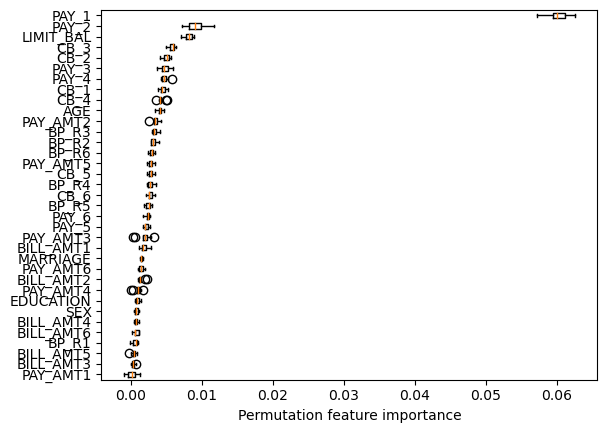

In [111]:
from sklearn.inspection import permutation_importance

def get_permutation_importance(model):
    ''' This function is adapted from lecture 8 course notes'''
    X_train_perm = X_train.drop(columns=["ID"])
    result = permutation_importance(model, X_train_perm, y_train, n_repeats=10, random_state=123)
    perm_sorted_idx = result.importances_mean.argsort()
    plt.boxplot(
        result.importances[perm_sorted_idx].T,
        vert=False,
        labels=X_train_perm.columns[perm_sorted_idx],
    )
    plt.xlabel('Permutation feature importance')
    plt.show()

get_permutation_importance(rf_best)


### Examine a model with averaged BILL_AMT and Bill:creadit ratio
(Note: we did not end up using the aggregated (averaged) features)

In [171]:
# Correlation > 0.8
# compute and take abs value
corr_df = X_train_enc.corr().abs()
# Set the diagonal to 0
corr_df[corr_df == 1] = 0 
corr_df.style.background_gradient()

# BILL_AMT > 0.9 = take average to summarize all
# CB > 0.8 = take average to summarize all


,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,BP_R1,BP_R2,BP_R3,BP_R4,BP_R5,BP_R6,CB_1,CB_2,CB_3,CB_4,CB_5,CB_6,SEX,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,EDUCATION,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
LIMIT_BAL,0.000000,0.143762,0.281147,0.274149,0.281585,0.295403,0.295890,0.290627,0.194901,0.185086,0.208824,0.206633,0.218735,0.215484,0.015521,0.006644,0.006646,0.012005,0.010390,0.003764,0.372013,0.375760,0.361862,0.351605,0.338766,0.321405,0.028783,0.014138,0.105738,0.093106,0.054517,0.236106,0.271943,0.296798,0.286341,0.267516,0.246327,0.232959
AGE,0.143762,0.000000,0.063786,0.061283,0.060710,0.058902,0.057727,0.055759,0.027385,0.022197,0.033865,0.025333,0.027371,0.019862,0.011421,0.000388,0.005190,0.005223,0.003162,0.001674,0.020222,0.023546,0.028863,0.039987,0.041926,0.041372,0.091181,0.009555,0.448538,0.464402,0.077076,0.183444,0.031713,0.045997,0.049451,0.044578,0.048421,0.041175
BILL_AMT1,0.281147,0.063786,0.000000,0.952083,0.903603,0.862954,0.831014,0.802961,0.148755,0.110264,0.148665,0.155304,0.170067,0.175553,0.006891,0.010023,0.007339,0.011393,0.003783,0.001906,0.567054,0.518066,0.474215,0.440010,0.410682,0.395627,0.034068,0.016267,0.029422,0.025409,0.012899,0.019796,0.187024,0.235397,0.209128,0.202419,0.206084,0.207767
BILL_AMT2,0.274149,0.061283,0.952083,0.000000,0.938375,0.894378,0.859710,0.830782,0.284862,0.111020,0.145682,0.143279,0.162327,0.173870,0.005581,0.011656,0.007352,0.014060,0.002175,0.003716,0.532294,0.564567,0.509103,0.472711,0.440310,0.423835,0.030320,0.015478,0.027101,0.022724,0.014975,0.013977,0.188512,0.235611,0.237849,0.225806,0.226636,0.227815
BILL_AMT3,0.281585,0.060710,0.903603,0.938375,0.000000,0.932546,0.891860,0.855598,0.252007,0.286017,0.119630,0.139180,0.168338,0.183262,0.006045,0.010988,0.007644,0.009881,0.004265,0.008040,0.491954,0.513770,0.565741,0.503719,0.467356,0.448740,0.022033,0.016603,0.030301,0.025393,0.017071,0.009631,0.180701,0.226124,0.229201,0.246155,0.244983,0.243814
BILL_AMT4,0.295403,0.058902,0.862954,0.894378,0.932546,0.000000,0.940675,0.900295,0.246057,0.221633,0.296772,0.141979,0.165582,0.175856,0.007226,0.009280,0.000079,0.005146,0.006866,0.004480,0.446824,0.466828,0.493499,0.555371,0.504983,0.480427,0.019149,0.015170,0.028306,0.022815,0.020444,0.002628,0.174788,0.218280,0.224511,0.242400,0.268108,0.264764
BILL_AMT5,0.295890,0.057727,0.831014,0.859710,0.891860,0.940675,0.000000,0.943940,0.230775,0.195717,0.247878,0.294784,0.147448,0.163675,0.005902,0.011396,0.001920,0.008391,0.007392,0.004051,0.417553,0.435237,0.458634,0.506355,0.557056,0.519737,0.013652,0.014387,0.030776,0.024971,0.022234,0.010496,0.177915,0.217724,0.222785,0.239384,0.267014,0.290852
BILL_AMT6,0.290627,0.055759,0.802961,0.830782,0.855598,0.900295,0.943940,0.000000,0.211412,0.171764,0.231370,0.247324,0.310870,0.107771,0.007842,0.008986,0.001520,0.008735,0.014029,0.005860,0.399660,0.416521,0.438249,0.480001,0.518474,0.570660,0.012961,0.013962,0.027305,0.022340,0.018376,0.009999,0.175052,0.217403,0.221013,0.236159,0.260056,0.285833
PAY_AMT1,0.194901,0.027385,0.148755,0.284862,0.252007,0.246057,0.230775,0.211412,0.000000,0.340847,0.265131,0.214747,0.144426,0.185393,0.000547,0.007607,0.002698,0.004775,0.000747,0.002741,0.018037,0.090133,0.064241,0.058299,0.048156,0.037776,0.002771,0.004014,0.007597,0.009876,0.012574,0.043595,0.077786,0.077185,0.001935,0.005258,0.001766,0.004030
PAY_AMT2,0.185086,0.022197,0.110264,0.111020,0.286017,0.221633,0.195717,0.171764,0.340847,0.000000,0.259019,0.204443,0.139175,0.168426,0.008056,0.091201,0.003496,0.002532,0.010362,0.011337,0.021281,0.031327,0.121869,0.043771,0.029518,0.025761,0.000243,0.006220,0.009756,0.012590,0.016107,0.033443,0.070684,0.057889,0.070524,0.000438,0.002064,0.001512


In [178]:
train_df_11 = train_df.copy()
test_df_11 = test_df.copy()

train_df_11['BILL_AMT_AVG'] = train_df_11[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5','BILL_AMT6']].mean(axis=1)
test_df_11['BILL_AMT_AVG'] = test_df_11[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5','BILL_AMT6']].mean(axis=1)

train_df_11['CB_AVG'] = train_df_11[['CB_1', 'CB_2', 'CB_3', 'CB_4', 'CB_5','CB_6']].mean(axis=1)
test_df_11['CB_AVG'] = test_df_11[['CB_1', 'CB_2', 'CB_3', 'CB_4', 'CB_5','CB_6']].mean(axis=1)

X_train_11 = train_df_11.drop(columns='target')
y_train_11 = train_df_11['target']
X_test_11 = test_df_11.drop(columns='target')
y_test_11 = test_df_11['target']

# create new preprocessor
edu_feat = ['EDUCATION']
pay_feat = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
binary_feat = ['SEX']
cat_feat = ['MARRIAGE']
drop_feat_11 = ['ID', 
'BILL_AMT1', 
'BILL_AMT2',
'BILL_AMT3', 
'BILL_AMT4', 
'BILL_AMT5', 
'BILL_AMT6', 
'CB_1', 
'CB_2',
'CB_3', 
'CB_4', 
'CB_5', 
'CB_6' ]
num_feat_11 =[
'LIMIT_BAL',
'AGE',
'BILL_AMT_AVG',
'PAY_AMT1',
'PAY_AMT2', 
'PAY_AMT3', 
'PAY_AMT4', 
'PAY_AMT5', 
'PAY_AMT6',
'BP_R1', 
'BP_R2', 
'BP_R3', 
'BP_R4', 
'BP_R5', 
'BP_R6', 
'CB_AVG'
]
pay_order = [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]

preprocessor_11 = make_column_transformer(
    (StandardScaler(),num_feat_11),
    (OneHotEncoder(drop='if_binary', dtype = int), binary_feat),
    (OneHotEncoder(handle_unknown="ignore", sparse=False, dtype = int), cat_feat),
    (OrdinalEncoder(dtype=int), edu_feat),
    (OrdinalEncoder(categories=[pay_order], dtype=int, handle_unknown = 'use_encoded_value', unknown_value = 12), ['PAY_1']),
    (OrdinalEncoder(categories=[pay_order], dtype=int, handle_unknown = 'use_encoded_value', unknown_value = 12), ['PAY_2']),
    (OrdinalEncoder(categories=[pay_order], dtype=int, handle_unknown = 'use_encoded_value', unknown_value = 12), ['PAY_3']),
    (OrdinalEncoder(categories=[pay_order], dtype=int, handle_unknown = 'use_encoded_value', unknown_value = 12), ['PAY_4']),
    (OrdinalEncoder(categories=[pay_order], dtype=int, handle_unknown = 'use_encoded_value', unknown_value = 12), ['PAY_5']),
    (OrdinalEncoder(categories=[pay_order], dtype=int, handle_unknown = 'use_encoded_value', unknown_value = 12), ['PAY_6']),
    ("drop", drop_feat_11)
)
preprocessor_11
transformed_11 = preprocessor_11.fit_transform(X_train_11)
column_names_11 = (
    num_feat_11    
    + binary_feat
    + preprocessor_11.named_transformers_["onehotencoder-2"].get_feature_names_out().tolist()
    + edu_feat
    + pay_feat
)

X_train_enc_11 = pd.DataFrame(transformed_11, columns=column_names_11)
X_train_enc_11.head(2)


,LIMIT_BAL,AGE,BILL_AMT_AVG,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,BP_R1,...,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,EDUCATION,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
0,0.246770,1.140423,0.812437,-0.117221,-0.042650,-0.110198,-0.149314,-0.122994,-0.207312,0.009269,...,1.0,0.0,0.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0
1,-0.368109,-0.378471,-0.694749,-0.298634,-0.261604,-0.267318,-0.261306,-0.315106,-0.271741,0.010529,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,4.0
2,-1.136707,-1.463396,-0.437266,-0.248029,-0.228531,-0.263701,1.004907,-0.269668,-0.234752,0.009660,...,0.0,1.0,0.0,0.0,2.0,2.0,2.0,2.0,1.0,2.0
3,-0.521828,-0.161486,0.092137,-0.038927,-0.098349,-0.126778,-0.050380,-0.104045,-0.187336,0.009438,...,0.0,1.0,0.0,3.0,2.0,2.0,2.0,2.0,2.0,1.0
4,0.938509,-0.703949,-0.573501,-0.270109,-0.206514,-0.221473,-0.281225,-0.249538,-0.234697,0.010282,...,0.0,1.0,0.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,1.630247,0.163991,-0.481125,-0.265693,-0.215977,-0.224700,-0.188887,-0.315106,-0.124993,0.009736,...,1.0,0.0,0.0,1.0,2.0,2.0,2.0,2.0,2.0,4.0
23996,1.476528,2.008362,-0.678174,-0.337542,-0.276875,-0.150257,-0.314202,0.139997,-0.289632,0.017445,...,1.0,0.0,0.0,0.0,3.0,0.0,0.0,1.0,2.0,1.0
23997,-0.906127,-0.703949,-0.184013,-0.218072,-0.183185,-0.208676,-0.248247,-0.293665,-0.271577,0.009335,...,1.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
23998,-1.059847,-1.571888,-0.279920,-0.218192,-0.183185,-0.182527,-0.197791,-0.293403,-0.289632,0.009572,...,0.0,1.0,0.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0


In [184]:
# train model with average features
rf_best_11 = make_pipeline(preprocessor_11, RandomForestClassifier(max_depth=10, class_weight='balanced', random_state=123))
dt_result_11 = cross_validate(rf_best_11, X_train_11, y_train_11, cv=5, return_train_score=True, scoring=classification_metrics)
pd.DataFrame(dt_result_11)

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
0,2.559861,0.076526,0.786458,0.845521,0.519358,0.650533,0.515947,0.658462,0.517647,0.654473
1,2.370928,0.057542,0.792500,0.843021,0.532528,0.642015,0.537523,0.663385,0.535014,0.652525
2,2.549649,0.060187,0.797708,0.844479,0.544434,0.644274,0.545966,0.669948,0.545199,0.656860
3,2.630666,0.061048,0.806042,0.840677,0.562500,0.635202,0.573571,0.664244,0.567981,0.649398
4,2.452911,0.059871,0.797292,0.839896,0.544090,0.632717,0.543580,0.665651,0.543835,0.648766


In [187]:
# Check importance
rf_best_11.fit(X_train_11, y_train_11)

eli5.explain_weights(rf_best_11.named_steps["randomforestclassifier"], feature_names=column_names_11)


Weight,Feature
0.2248 ± 0.2466,PAY_1
0.1163 ± 0.2583,PAY_2
0.0743 ± 0.1824,PAY_3
0.0528 ± 0.0377,CB_AVG
0.0451 ± 0.1363,PAY_4
0.0391 ± 0.0292,BILL_AMT_AVG
0.0377 ± 0.0464,PAY_AMT2
0.0375 ± 0.0517,PAY_AMT1
0.0372 ± 0.0411,LIMIT_BAL
0.0300 ± 0.0332,PAY_AMT3


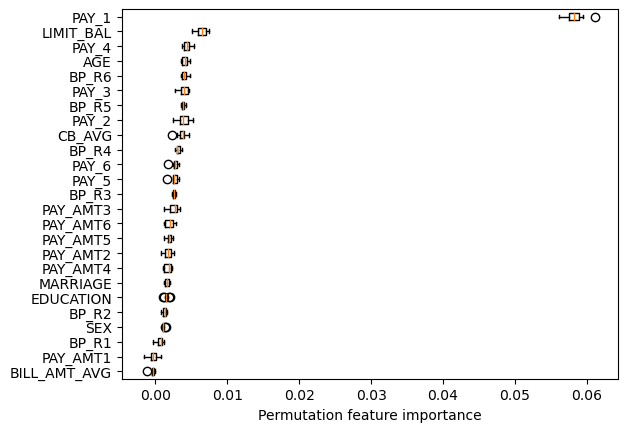

In [188]:
def get_permutation_importance_11(model):
    ''' This function is adapted from lecture 8 course notes'''
    X_train_perm = X_train_11.drop(columns=drop_feat_11)
    result = permutation_importance(model, X_train_perm, y_train_11, n_repeats=10, random_state=123)
    perm_sorted_idx = result.importances_mean.argsort()
    plt.boxplot(
        result.importances[perm_sorted_idx].T,
        vert=False,
        labels=X_train_perm.columns[perm_sorted_idx],
    )
    plt.xlabel('Permutation feature importance')
    plt.show()

get_permutation_importance_11(rf_best_11)


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 12. Results on the test set <a name="12"></a>
rubric={accuracy,reasoning}

**Your tasks:**

1. Try your best performing model on the test data and report test scores. 
2. Do the test scores agree with the validation scores from before? To what extent do you trust your results? Do you think you've had issues with optimization bias? 
3. Take one or two test predictions and explain them with SHAP force plots.  
    
</div>

_Points:_ 6

1. The best performing model, i.e. `RandomForestClassifier` shows an f1 score of 0.538 on the test set. From the confusion matrix and classification report on the test data shown below, it can be seen that there are more true negative cases than false positive, false negative and true positive. The number of false negative cases and false positive cases are similar, which might be a result of using the `class_weight = 'balanced'` that deals with class imbalance problem. The precision, recall and f1 score are very close in values, which further proves the effect of balancing the classes in the target. 
2. The test score agrees with the validation score of 0.541 from before. There might be some degree of optimization bias in the model, since the mean training score of 0.667 is higher than the mean validation score of 0.541, which suggests that there is overfitting in the model. The `max_depth` of 10 obtained from hyperparameter optimization on the `RandomForestClassifier` is quite a large number, which can consequently lead to a complex model, resulting in overfitting. Therefore we should not fully trust the results. 

In [59]:
y_predict = rf_best.predict(X_test)
best_score = f1_score(y_test, y_predict)
best_score

0.5375000000000001

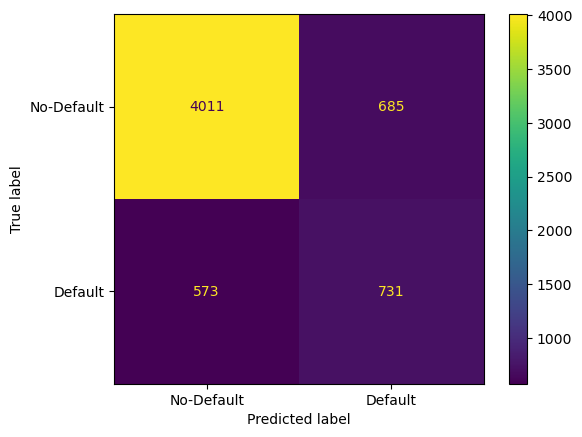

In [60]:
confmat_rf_best = ConfusionMatrixDisplay.from_estimator(
      rf_best, X_test, y_test, values_format="d", display_labels=["No-Default", "Default"]
  )
confmat_rf_best

In [61]:
print(
    classification_report(
        y_test, rf_best.predict(X_test), target_names=["no-default", "default"]
    )
)


              precision    recall  f1-score   support

  no-default       0.88      0.85      0.86      4696
     default       0.52      0.56      0.54      1304

    accuracy                           0.79      6000
   macro avg       0.70      0.71      0.70      6000
weighted avg       0.80      0.79      0.79      6000



In [62]:
X_test_enc = pd.DataFrame(
    data=preprocessor.transform(X_test),
    columns=column_names,
    index=X_test.index,
)
X_test_enc

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,EDUCATION,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
25665,-0.982987,-1.029426,-0.300983,-0.346026,-0.484529,-0.671954,0.061206,-0.337159,-0.259964,-0.230030,...,0.0,1.0,0.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0
16464,-0.675548,2.550825,0.335277,0.296127,0.090264,0.115932,0.165482,0.181306,-0.145865,-0.178220,...,1.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
22386,0.016191,-0.595456,1.429288,1.543630,1.663729,1.768395,2.099254,2.227535,0.068249,0.027617,...,0.0,1.0,0.0,0.0,4.0,4.0,4.0,4.0,4.0,4.0
10149,0.246770,0.597961,-0.374887,-0.678558,-0.682087,-0.671954,-0.661958,-0.652167,-0.293263,-0.276875,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8729,-0.906127,0.814945,-0.584234,-0.575956,-0.550711,-0.529090,-0.507269,-0.490140,-0.269512,-0.223004,...,1.0,0.0,0.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9940,-0.060669,1.682885,-0.677401,-0.668072,-0.643985,-0.633904,-0.581271,-0.590352,-0.258115,-0.161028,...,1.0,0.0,0.0,0.0,2.0,2.0,2.0,4.0,4.0,4.0
11351,-0.752408,1.899870,-0.504618,-0.476939,-0.452760,-0.422618,-0.391955,-0.369727,-0.244807,-0.217710,...,0.0,1.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
29732,-1.213567,1.031930,-0.610041,-0.603494,-0.535923,-0.574899,-0.671979,-0.655874,-0.337542,-0.074880,...,1.0,0.0,0.0,1.0,3.0,4.0,4.0,4.0,4.0,0.0
9088,-0.906127,1.574393,-0.072224,-0.360757,-0.682087,-0.619300,-0.616473,-0.652167,-0.202318,-0.276875,...,0.0,0.0,0.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0


In [63]:
import shap

rf_explainer = shap.TreeExplainer(rf_best.named_steps["randomforestclassifier"])
rf_explainer

/Users/Jialing/opt/miniconda3/envs/573/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [64]:
train_rf_shap_values = rf_explainer.shap_values(X_train_enc)

In [65]:
test_rf_shap_values = rf_explainer.shap_values(X_test_enc)

In [66]:
shap.initjs()
y_test_reset = y_test.reset_index(drop=True)

In [67]:
default_1 = y_test_reset[y_test_reset == 1].index.tolist()
default_0 = y_test_reset[y_test_reset == 0].index.tolist()

default_1_index = default_1[8]
default_0_index = default_0[8]

In [68]:
rf_best.named_steps["randomforestclassifier"].fit(X_train_enc, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, random_state=123)

From the SHAP plot for this example, it can be seen that this particular prediction shows a raw score of 0.61, which is higher than the base value of 0.5. Among all the features, it can be seen that `PAY_1`= 2.0, `PAY_2`=2.0, `PAY_AMT2` = 0.058 and `PAY_AMT1` = 0.099 are pushing the target towards 1, while `CB_2` = 1.488 is pushing the target towards 0.

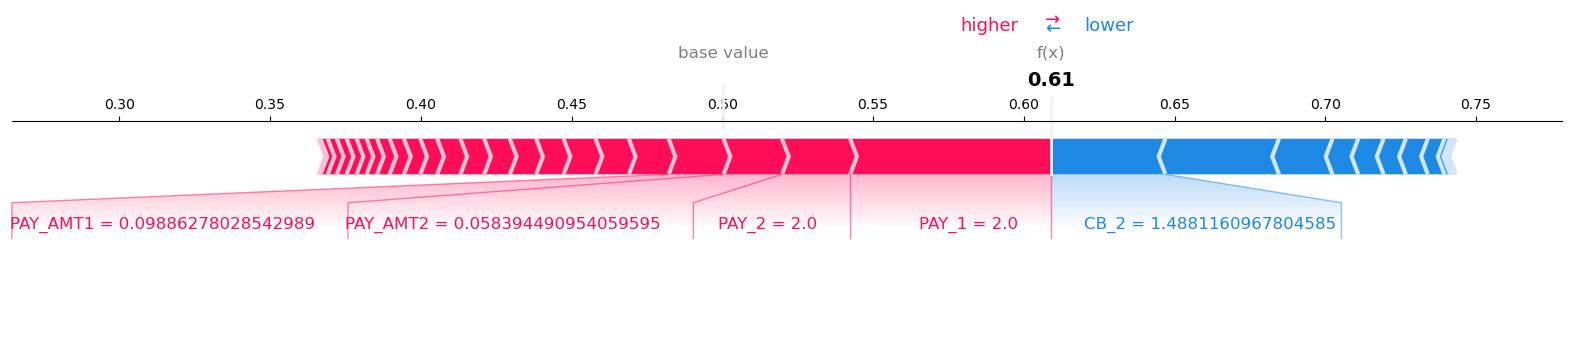

In [69]:
shap.force_plot(
    rf_explainer.expected_value[0], # expected value for class 1. 
    test_rf_shap_values[0][default_0_index, :], # SHAP values associated with the example we want to explain
    X_test_enc.iloc[default_0_index, :], # Feature vector of the example 
    matplotlib=True,
)

From the SHAP plot for this example, it can be seen that this particular prediction shows a raw score of 0.37, which is lower than the base value of 0.5. Among all the features, it can be seen that `PAY_AMT5`= -0.315, `BILL_AMT2`= -0.671, `BILL_AMT1` = -0.696 and `PAY_AMT1` = -0.696 are pushing the target towards 1, while `PAY_1` = 1.0, `PAY_AMT3` = -0.127, `PAY_2` = 1.0  and `BP_R3` = 0.014 are pushing the target towards 0.

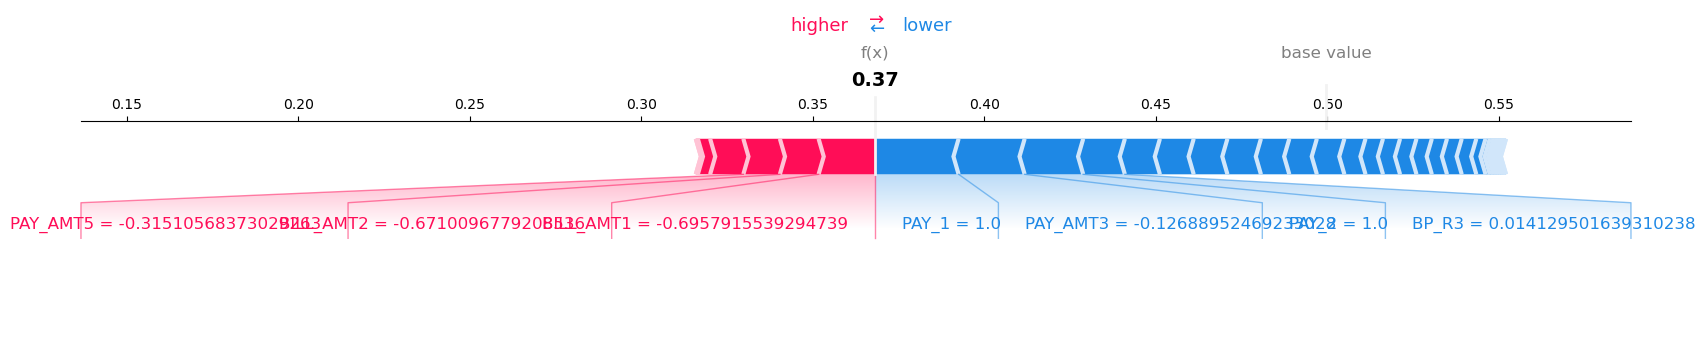

In [70]:
shap.force_plot(
    rf_explainer.expected_value[1], # expected value for class 1. 
    test_rf_shap_values[1][default_1_index, :], # SHAP values associated with the example we want to explain
    X_test_enc.iloc[default_1_index, :], # Feature vector of the example 
    matplotlib=True,
)

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 13. Summary of results <a name="13"></a>
rubric={reasoning}

Imagine that you want to present the summary of these results to your boss and co-workers. 

**Your tasks:**

1. Create a table summarizing important results. 
2. Write concluding remarks.
3. Discuss other ideas that you did not try but could potentially improve the performance/interpretability . 
3. Report your final test score along with the metric you used at the top of this notebook.
    
</div>

_Points:_ 8

#### 13.1 Table summarizing important results 

| Step | Results | Values
| --- | ----------- | ----- |
| 1. Exporatory Data Analysis | ... | ... |
| 2. Data Preprocessing and Transformation | ... | ... |
| 3. Baseline Model | ... | ... |
| 4. Linear Model | ... | ... |
| 5. Non-Linear Models | ... | ... |
| 6. Feature Selection | ... | ... |
| 7. Hyperparameter Optimization | ... | ... |
| 8. Feature Importances | ... | ... |
| 9. Scoring on Test Data | ... | ... |

#### 13.2 Concluding remarks

*Problem and Dataset*

*Analysis*

*Results*

*Conclusion*

### Limitations and Future Directions

When comparing different models, we noticed that tree-based model seems to be appropriate for this question. If time and computation resources allows, future studies could be carried out using gradient boosted trees such as xgboost or light GBM models. These methods could learn from the mistake made by the previous trees and correct the mistakes, thus they might perform better than random forest model.

It is worthwhile to mention that, in this study we focused on improving the f1 score, which is a combination of recall and precision. In practice, it would be better to have a conversation with the domain expert and see if f1 is indeed the metric to be optimized, if recall (i.e. capturing true positives) or if precision (ensuring that the false positive is low) is of higher priority. Depending on the client requirement, a different model could have been chosen. For example we noticed that analogy based KNN model performed well on precision. 

Finaly, during our analysis we observed that there is strong correlation between user's spending habits and payment habbits from one month to another. For example, if the person did not pay the entire bill this month, the bill is accumulated and the bill amount can be higher next month. Also, we noticed that the feature from certain months could be more important than other months(e.g. PAY_1 is the most important feature compared to other month's repayment status). These are the indications that time series analysis could be employed to capture the patter over the 6 months of period. 


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-warning">

## 14. Creating a data analysis pipeline (Challenging)
rubric={reasoning}

**Your tasks:**
- In 522 you learned how build a reproducible data analysis pipeline. Convert this notebook into scripts and create a reproducible data analysis pipeline with appropriate documentation. Submit your project folder in addition to this notebook on GitHub and briefly comment on your organization in the text box below.
    
</div>

_Points:_ 2

_Type your answer here, replacing this text._

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-warning">

## 15. Your takeaway from the course (Challenging)
rubric={reasoning}

**Your tasks:**

What is your biggest takeaway from this course? 
    
</div>

_Points:_ 0.25

#### Our takeaways 

1. We cannot always rely on accuracy as a measure in classification, sometimes there is class imbalance so we need to look at confusion matrices and analyze our results carefully 

<!-- END QUESTION -->

<div class="alert alert-danger" style="color:black">
    
**Restart, run all and export a PDF before submitting**
    
Before submitting,
don't forget to run all cells in your notebook
to make sure there are no errors
and so that the TAs can see your plots on Gradescope.
You can do this by clicking the ▶▶ button
or going to `Kernel -> Restart Kernel and Run All Cells...` in the menu.
This is not only important for MDS,
but a good habit you should get into before ever committing a notebook to GitHub,
so that your collaborators can run it from top to bottom
without issues.
    
After running all the cells,
export a PDF of the notebook (preferably the WebPDF export)
and upload this PDF together with the ipynb file to Gradescope
(you can select two files when uploading to Gradescope)
</div>

---

## Help us improve the labs

The MDS program is continually looking to improve our courses, including lab questions and content. The following optional questions will not affect your grade in any way nor will they be used for anything other than program improvement:

1. Approximately how many hours did you spend working or thinking about this assignment (including lab time)?

#Ans:

2. Do you have any feedback on the lab you be willing to share? For example, any part or question that you particularly liked or disliked?

#Ans: